### 1. Data Cleaning

#### 1.1 Date fields

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import math
import scipy.stats as stats
import warnings 
import matplotlib
import matplotlib.cm as cm
sns.set(rc={'figure.figsize':(12,6)})
warnings.simplefilter(action='ignore', category= FutureWarning)
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
# reading the csv file
df = pd.read_csv('logbook_assignment1.csv')
df.head()

/tmp/ipykernel_1041/247795474.py:2: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('logbook_assignment1.csv')


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,"Cooling System, Heating System, Lights, Spark ...",Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,Nov 7 2012,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,Sep 22 2012,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,May 4 2019,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,Feb 15 2022,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


In [3]:
df.dtypes

date_fueled        object
date_captured      object
odometer           object
gallons            object
cost_per_gallon    object
total_spent        object
mpg                object
miles              object
user_url           object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174870 entries, 0 to 1174869
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   date_fueled      1125665 non-null  object
 1   date_captured    1174870 non-null  object
 2   odometer         1025716 non-null  object
 3   gallons          1100660 non-null  object
 4   cost_per_gallon  1094110 non-null  object
 5   total_spent      1100660 non-null  object
 6   mpg              1100660 non-null  object
 7   miles            146274 non-null   object
 8   user_url         1174870 non-null  object
dtypes: object(9)
memory usage: 80.7+ MB


1. Identify what percentage of date fueled entries that are not proper dates.
[1]

In [5]:
valid_dates = pd.to_datetime(df['date_fueled'], format='%b %d %Y', errors='coerce').notna()
perc_invalid_dates = sum(valid_dates == False)/len(df)*100
print('Percentage of date_fueled entries not proper dates:', perc_invalid_dates, '%')

Percentage of date_fueled entries not proper dates: 11.678738924306518 %


2. If date fueled is not entered correctly (or is not a date), and the date
captured is a valid date, then fill in this value as a proxy. [1]

In [6]:
valid_ = pd.to_datetime(df['date_captured'], format='%b %d %Y', errors='coerce').notna()
val_cap = sum(valid_ == True)/len(df)*100
print('Percent of valid dates in date_captured:', val_cap)

Percent of valid dates in date_captured: 100.0


In [7]:
df['date_fueled'] = np.where((pd.to_datetime(df['date_fueled'], format='%b %d %Y', errors='coerce').notna() == False),df['date_captured'],df['date_fueled'])
df['date_fueled']

0           Apr 7 2022
1           Nov 7 2012
2          Sep 22 2012
3           May 4 2019
4          Feb 15 2022
              ...     
1174865    Feb 19 2020
1174866     Dec 6 2019
1174867     Oct 4 2021
1174868    Jul 26 2021
1174869    Mar 12 2019
Name: date_fueled, Length: 1174870, dtype: object

3. Convert the column to a date format, setting any invalid date fueled entries
to NaT. [2]

In [8]:
df['date_fueled'] = pd.to_datetime(df['date_fueled'], format='%b %d %Y', errors='coerce')

df['date_captured'] = pd.to_datetime(df['date_captured'], format='%b %d %Y', errors='coerce')

df.dtypes

date_fueled        datetime64[ns]
date_captured      datetime64[ns]
odometer                   object
gallons                    object
cost_per_gallon            object
total_spent                object
mpg                        object
miles                      object
user_url                   object
dtype: object

In [9]:
df.sample(15)

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
394340,2021-11-15,2021-11-15,"153,888",14.062,$4.019,$56.52,22.0,NaN,https://www.somewebsite.com/bmw/325ci/2003/754782
1135255,2016-12-15,2017-06-10,"128,320",13.701,$2.359,$32.32,8.6,NaN,https://www.somewebsite.com/land_rover/range_r...
37204,2020-08-20,2020-08-20,"15,265",18.826,$1.859,$35.00,0.0,NaN,https://www.somewebsite.com/nissan/nv2500/2014...
846630,2016-04-22,2016-07-24,"70,024",9.492,£4.05,£38.41,35.3,NaN,https://www.somewebsite.com/citroen/c4/2006/44...
594239,2014-10-11,2014-10-11,"34,097",10.464,£4.68,£49.00,28.3,NaN,https://www.somewebsite.com/mercedes-benz/slk2...
32784,2017-10-16,2017-10-16,NaN,15.526,$3.199,$49.67,22.2,344.1,https://www.somewebsite.com/toyota/cressida/19...
647818,2016-11-02,2016-11-03,"221,366",34.683,AU$4.50,AU$156.10,15.5,NaN,https://www.somewebsite.com/toyota/land_cruise...
64725,2021-11-03,2021-11-03,"77,842",9.3,$3.839,$35.70,32.4,NaN,https://www.somewebsite.com/volkswagen/jetta_s...
818625,2017-10-31,2017-10-31,"11,507",2.911,"$2,392.846","$6,966.00",43.5,NaN,https://www.somewebsite.com/fiat/500x/2017/571266
530784,2021-10-15,2021-10-15,"237,956",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/honda/pilot/2011/9...


4. Remove dates that are in the future, or dates that are earlier than 2005.
[1]


In [10]:
print("Before removing invalid dates, the shape of the dataframe is:", df.shape)

df = df.loc[(df['date_fueled'] >= '2005-01-01') & (df['date_fueled'] <= datetime.datetime.now())]

print("After removing invalid dates, the shape of the dataframe is:", df.shape)

Before removing invalid dates, the shape of the dataframe is: (1174870, 9)
After removing invalid dates, the shape of the dataframe is: (1174300, 9)


In [11]:
print("Min Date: ", min(df['date_fueled']))

print("Max Date: ", max(df['date_fueled']))

df.shape

Min Date:  2005-01-02 00:00:00
Max Date:  2025-08-09 00:00:00


(1174300, 9)

5. Plot the distribution of fueling dates and comment on the results. [2]

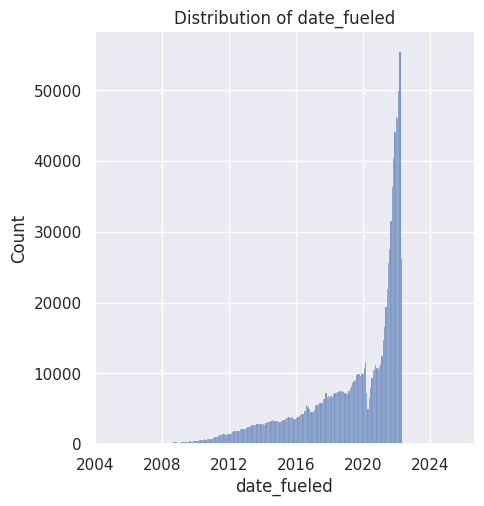

In [12]:
sns.displot(df, x="date_fueled")
plt.title("Distribution of date_fueled")
plt.show()

#### 1.2 Numeric Fields

1. Identify what percentage of gallons, miles, and odometer entries are
missing. [3]

In [13]:
(df[['gallons', 'miles', 'odometer', 'mpg']].isna().sum()/len(df))*100

gallons      6.316188
miles       87.553692
odometer    12.691561
mpg          6.316188
dtype: float64

2. The miles, gallons and mpg columns are interdependent. If one is miss-
ing, the other two can be used to calculate it. [3]

In [15]:
df.dtypes

date_fueled        datetime64[ns]
date_captured      datetime64[ns]
odometer                   object
gallons                    object
cost_per_gallon            object
total_spent                object
mpg                        object
miles                      object
user_url                   object
dtype: object

In [16]:
df[['gallons', 'miles', 'odometer', 'mpg']].isna().sum()/len(df)*100


gallons      6.316188
miles       87.553692
odometer    12.691561
mpg          6.316188
dtype: float64

In [18]:
df['miles'] = df['miles'].replace(',', '', regex=True)
df['miles'] = df['miles'].astype(float)
df['odometer'] = df['odometer'].replace(',', '', regex=True)
df['odometer'] = df['odometer'].astype(float)
df['gallons'] = df['gallons'].replace(',', '', regex=True)
df['gallons'] = df['gallons'].astype(float)
df['mpg'] = df['mpg'].replace(',', '', regex=True)
df['mpg'] = df['mpg'].astype(float)

df.dtypes

date_fueled        datetime64[ns]
date_captured      datetime64[ns]
odometer                  float64
gallons                   float64
cost_per_gallon            object
total_spent                object
mpg                       float64
miles                     float64
user_url                   object
dtype: object

In [19]:
#The formula to calculate mpg: Miles driven ÷ gallons used to refill the tank
df['mpg'] = df['mpg'].fillna(df['miles']/df['gallons'])

#Formula for Miles: mpg*gallons
df['miles'] = df['miles'].fillna(df['mpg']*df['gallons'])

#Formula for gallons: miles/mpg
df['gallons'] = df['gallons'].fillna(df['miles']/df['mpg'])

df[['gallons', 'miles', 'mpg']].isna().sum()/len(df)*100

gallons    6.316188
miles      6.316188
mpg        6.316188
dtype: float64

3. The values will be read in as objects (or strings) by Pandas. Convert these
values to float (note the point above about commas in the value). [5]

In [20]:
df['miles'] = df['miles'].replace(',', '', regex=True)
df['miles'] = df['miles'].astype(float)
df['odometer'] = df['odometer'].replace(',', '', regex=True)
df['odometer'] = df['odometer'].astype(float)
df['gallons'] = df['gallons'].replace(',', '', regex=True)
df['gallons'] = df['gallons'].astype(float)
df['mpg'] = df['mpg'].replace(',', '', regex=True)
df['mpg'] = df['mpg'].astype(float)

df.dtypes

date_fueled        datetime64[ns]
date_captured      datetime64[ns]
odometer                  float64
gallons                   float64
cost_per_gallon            object
total_spent                object
mpg                       float64
miles                     float64
user_url                   object
dtype: object

4. Plot the distributions and comment on the distributions. [3]

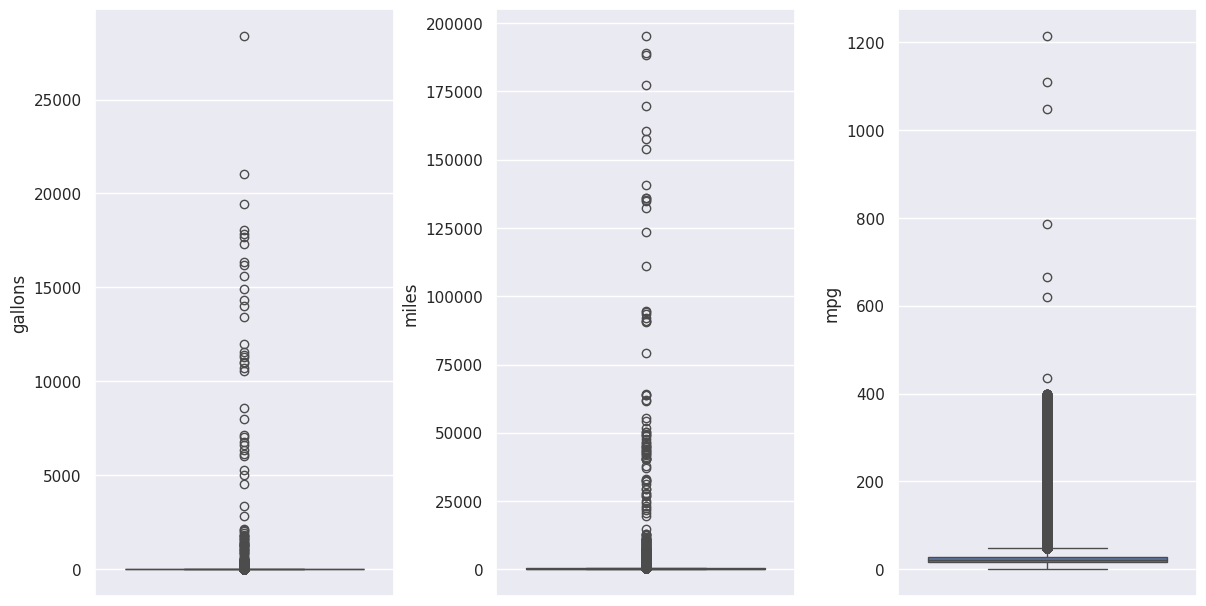

In [21]:
data_m_g_mpg = df[['gallons', 'miles', 'mpg']]
fig, axs = plt.subplots(ncols=3, nrows=1)
index = 0
axs = axs.flatten()
for k,v in data_m_g_mpg.items():
    sns.boxplot(y=k, data=data_m_g_mpg, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

5. Compute the statistical description of the columns: mean, standard de-
viation, max, min, most frequent, and quartiles. Do these results make
sense? [3]

In [23]:
# suppressing scientific notation when printing float values
pd.options.display.float_format = '{}'.format

df[['miles', 'gallons', 'mpg']].describe()

,miles,gallons,mpg
count,1100129.0,1100129.0,1100129.0
mean,269.4538013011202,12.797430474971572,22.163024699830657
std,725.7634370035393,74.48279111437778,15.744350144205045
min,0.0,0.0,0.0
25%,181.4,8.99,15.6
50%,267.0486,11.954,21.8
75%,342.7641,14.939,28.5
max,195321.2,28380.0,1214.3


These descriptions show that the mean for gallons is approximately 13 which makes sense, as I have mentioned that an average sized tank can hold between 12 to 18 gallons of fuel. There are clearly some extremes which do not make sense in this column. As we can see the maximum gallons is 28380, which seems highly unlikely for a car to be filled with that many gallons of fuel.

For mpg, the values make sense in relation to the values of miles and gallons. In reality, an average car (based in USA) gets an average of 25mpg. The average mpg here is 22 which is very close to 25, thus it makes sense in this aspect as well.

For miles, the average is 269 miles. This makes sense in relation to the average of 22mpg. If a car rides 269 miles based on 22mpg, on average they would consume 12-13 gallons of fuel. The maximum miles driven is 195321 miles. In relation to the extreme max value of gallons, this makes sense.

### 2 Feature engineering

1. Create a new column with the currency. (Something to keep in mind is
that the Swiss Franc has a period in the abbreviation). [2]


In [24]:
df['Currency'] = df['total_spent'].astype(str).str.extract(r'([^\d.,]+)')

In [25]:
df['Currency'].value_counts()


Currency
$      741953
£       87587
nan     74171
€       59273
CA$     46848
        ...  
TMT        11
CV$        11
KGS         9
L$          9
IQD         8
Name: count, Length: 121, dtype: int64

In [26]:
df.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,Currency
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,nan
1,2012-11-07,2016-08-30,11983.0,12.12,$5.599,$67.86,31.6,382.992,https://www.somewebsite.com/bmw/x3/2009/461150,$
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.74349999999998,https://www.somewebsite.com/mercedes-benz/e300...,£
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9099999999999,https://www.somewebsite.com/bmw/320d/2010/247233,£
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,$


2. Create a new column containing the float value of the total spend and the
cost per gallon. (Swiss Franc comment as above). [2]


In [27]:
df["float_tot_spent"] = df["total_spent"].str.extract("(\d*\.?\d+)", expand=True)
df.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,Currency,float_tot_spent
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,nan,NaN
1,2012-11-07,2016-08-30,11983.0,12.12,$5.599,$67.86,31.6,382.992,https://www.somewebsite.com/bmw/x3/2009/461150,$,67.86
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.74349999999998,https://www.somewebsite.com/mercedes-benz/e300...,£,43.53
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9099999999999,https://www.somewebsite.com/bmw/320d/2010/247233,£,54.00
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,$,35.29


In [28]:
df['float_cpg'] = df['cost_per_gallon'].str.extract("(\d*\.?\d+)", expand=True)
df.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,Currency,float_tot_spent,float_cpg
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,nan,NaN,NaN
1,2012-11-07,2016-08-30,11983.0,12.12,$5.599,$67.86,31.6,382.992,https://www.somewebsite.com/bmw/x3/2009/461150,$,67.86,5.599
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.74349999999998,https://www.somewebsite.com/mercedes-benz/e300...,£,43.53,5.45
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9099999999999,https://www.somewebsite.com/bmw/320d/2010/247233,£,54.00,5.11
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,$,35.29,3.029


In [29]:
df.dtypes

date_fueled        datetime64[ns]
date_captured      datetime64[ns]
odometer                  float64
gallons                   float64
cost_per_gallon            object
total_spent                object
mpg                       float64
miles                     float64
user_url                   object
Currency                   object
float_tot_spent            object
float_cpg                  object
dtype: object

In [30]:
df['float_cpg'] = df['float_cpg'].astype(float)
df["float_tot_spent"] = df["float_tot_spent"].astype(float)
df.dtypes

date_fueled        datetime64[ns]
date_captured      datetime64[ns]
odometer                  float64
gallons                   float64
cost_per_gallon            object
total_spent                object
mpg                       float64
miles                     float64
user_url                   object
Currency                   object
float_tot_spent           float64
float_cpg                 float64
dtype: object

3. Car make, model, year, User ID: use the url (the last value in the URL is
the user ID) [4]


In [32]:
with pd.option_context('display.max_colwidth', None):
    display(df['user_url'].head(10))

0          https://www.somewebsite.com/suzuki/swift/2015/674857
1                https://www.somewebsite.com/bmw/x3/2009/461150
2    https://www.somewebsite.com/mercedes-benz/e300/1998/133501
3              https://www.somewebsite.com/bmw/320d/2010/247233
4       https://www.somewebsite.com/honda/passport/2019/1038865
5     https://www.somewebsite.com/volkswagen/passat/2004/445811
6         https://www.somewebsite.com/mazda/3_sport/2010/529810
7      https://www.somewebsite.com/subaru/forester/2020/1087864
8              https://www.somewebsite.com/kianival/2009/789684
9           https://www.somewebsite.com/lexus/rx350/2012/898688
Name: user_url, dtype: object

In [ ]:
df['car_make'] = df['user_url'].str.split('/').str[3]
df['car_model'] = df['user_url'].str.split('/').str[4]
df['car_year'] = df['user_url'].str.split('/').str[5] 
df['user_ID'] = df['user_url'].str.split('/').str[-1]

#reorder columns
columns = ['user_ID', 'date_fueled', 'date_captured', 'odometer', 'gallons','cost_per_gallon', 'float_cpg', 'total_spent','Currency','float_tot_spent', 'mpg', 'miles', 'user_url','car_make', 'car_model', 'car_year']
df = df.reindex(columns=columns)

In [35]:
df.head()

,user_ID,date_fueled,date_captured,odometer,gallons,cost_per_gallon,float_cpg,total_spent,Currency,float_tot_spent,mpg,miles,user_url,car_make,car_model,car_year
0,674857,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,suzuki,swift,2015
1,461150,2012-11-07,2016-08-30,11983.0,12.12,$5.599,5.599,$67.86,$,67.86,31.6,382.992,https://www.somewebsite.com/bmw/x3/2009/461150,bmw,x3,2009
2,133501,2012-09-22,2012-09-28,98233.0,7.991,£5.45,5.45,£43.53,£,43.53,28.5,227.74349999999998,https://www.somewebsite.com/mercedes-benz/e300...,mercedes-benz,e300,1998
3,247233,2019-05-04,2019-05-04,163802.0,10.575,£5.11,5.11,£54.00,£,54.0,46.8,494.9099999999999,https://www.somewebsite.com/bmw/320d/2010/247233,bmw,320d,2010
4,1038865,2022-02-15,2022-02-15,NaN,11.651,$3.029,3.029,$35.29,$,35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,honda,passport,2019


The data is given in imperial units, and in SA, we use proper measurement
standards.
1. litres filled: use the gallons - consider whether to use UK or US gallons.
[2]

In [36]:
# Formula to convert to litres from gallons: gallons*3.785411784
# US Standard: 1 US liquid gallon = 3,78541 Liter
# UK Standard: 1 UK Gallon  = 4.54609 Litres

df['litres_filled'] = df['gallons']*3.785411784

2. km driven: use the miles driven to compute this [1]

In [37]:
# Formula to convert from miles to km: miles*1.6
df['km_driven'] = df['miles']*1.6


3. litres per 100km: use the two new features to calculate this. [1]

In [38]:
# Formula for litres per 100km: (litres_filled/km_driven)*100
df['litres_per_100km'] = (df['litres_filled']/df['km_driven'])*100

In [39]:
df.head()

,user_ID,date_fueled,date_captured,odometer,gallons,cost_per_gallon,float_cpg,total_spent,Currency,float_tot_spent,mpg,miles,user_url,car_make,car_model,car_year,litres_filled,km_driven,litres_per_100km
0,674857,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,suzuki,swift,2015,NaN,NaN,NaN
1,461150,2012-11-07,2016-08-30,11983.0,12.12,$5.599,5.599,$67.86,$,67.86,31.6,382.992,https://www.somewebsite.com/bmw/x3/2009/461150,bmw,x3,2009,45.87919082208,612.7872000000001,7.48696950949367
2,133501,2012-09-22,2012-09-28,98233.0,7.991,£5.45,5.45,£43.53,£,43.53,28.5,227.74349999999998,https://www.somewebsite.com/mercedes-benz/e300...,mercedes-benz,e300,1998,30.249225565944,364.3896,8.301341631578946
3,247233,2019-05-04,2019-05-04,163802.0,10.575,£5.11,5.11,£54.00,£,54.0,46.8,494.9099999999999,https://www.somewebsite.com/bmw/320d/2010/247233,bmw,320d,2010,40.0307296158,791.8559999999999,5.055304198717949
4,1038865,2022-02-15,2022-02-15,NaN,11.651,$3.029,3.029,$35.29,$,35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,honda,passport,2019,44.103832695384,391.04,11.278598786667347


In [40]:
df.dtypes

user_ID                     object
date_fueled         datetime64[ns]
date_captured       datetime64[ns]
odometer                   float64
gallons                    float64
cost_per_gallon             object
float_cpg                  float64
total_spent                 object
Currency                    object
float_tot_spent            float64
mpg                        float64
miles                      float64
user_url                    object
car_make                    object
car_model                   object
car_year                    object
litres_filled              float64
km_driven                  float64
litres_per_100km           float64
dtype: object

### 3. Vehicle Exploration

1. Plot the number of unique users per country (remember, we proxy this by
currency). [2]

In [41]:
# Number of unique currencies 
df['Currency'].nunique()

121

In [42]:
len(df)

1174300

In [43]:
# Number of unique users
df['user_ID'].nunique()

120201

In [44]:
# Number of unique users per country: Unsure
unq_users_per_country = df.groupby(['user_ID', 'Currency']).Currency.count().reset_index(name='count')

In [45]:
len(unq_users_per_country)

152856

In [46]:
# Unique users per currency
unq_users_per_country['Currency'].value_counts()

Currency
$      78723
nan    32933
£      10847
€       6758
CA$     5074
       ...  
L$         1
CU$        1
YR         1
TMT        1
KGS        1
Name: count, Length: 121, dtype: int64

In [47]:
# Users per currency
df['Currency'].value_counts()

Currency
$      741953
£       87587
nan     74171
€       59273
CA$     46848
        ...  
TMT        11
CV$        11
KGS         9
L$          9
IQD         8
Name: count, Length: 121, dtype: int64

In [48]:
# Percentage of unique users
df['user_ID'].nunique()/len(df) * 100

10.235970365324022

In [49]:
# Unique currencies
df['Currency'].unique()

array(['nan', '$', '£', 'RON', '€', 'NZ$', 'zł', 'AU$', '₩', 'Ft', 'Nkr',
       'R$', 'CA$', 'RUB', '₪', 'Rp', 'RM', 'R', 'Skr', 'AR$', 'TL',
       'din', 'Ikr', '฿', 'CN¥', 'HK$', 'Dkr', '₡', '₴', 'IRR', 'S$',
       'Rs', 'BGN', '¥', 'AED', 'MKD', '₱', 'BD', 'CL$', 'EC$', '$U',
       'LE', 'MXN', 'CO$', 'CFPF', 'Kč', 'kn', 'JD', 'FCFA', 'NT$', 'BN$',
       'RD$', 'S/', 'J$', 'PKRs', 'Ksh', 'GY$', 'KM', 'Fr', 'CFA', 'MDL',
       'MMK', 'N$', '₦', 'ZWL', 'USh', 'MURs', 'BYN', 'TT$', 'KD', 'B/',
       'Bs', 'SLRs', 'SR', 'GTQ', 'QR', 'Br', 'C$', 'BWP', 'GH₵', 'Tk',
       'SR$', 'man', 'KHR', 'BZ$', 'Bds$', 'Kz', 'NPRs', 'OMR', '₲',
       'LB£', 'HNL', 'AMD', 'GEL', '₮', 'MTn', 'ZMW', 'SH£', '₫', 'RWF',
       'MGA', 'DT', 'VT', 'MOP$', 'TMT', 'SY£', 'BS$', 'Af', 'ALL', 'DA',
       'TSh', 'KY$', 'NAf', 'KZT', 'YR', 'MAD', 'CV$', 'IQD', 'CU$',
       'KGS', 'L$'], dtype=object)

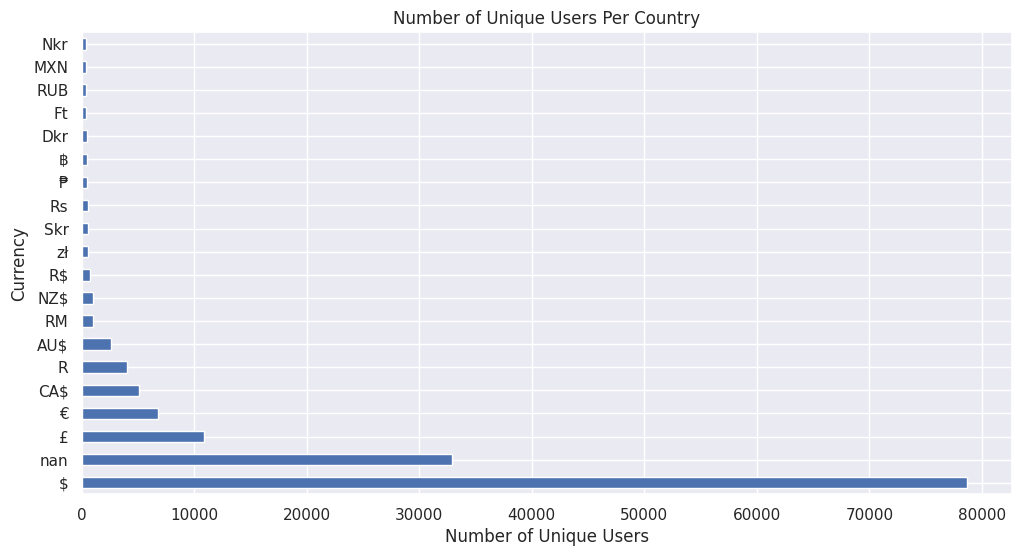

In [50]:
unq_users_per_country['Currency'].value_counts()[:20].plot(kind='barh')
plt.title("Number of Unique Users Per Country")
plt.xlabel("Number of Unique Users")
plt.ylabel("Currency")
plt.show()

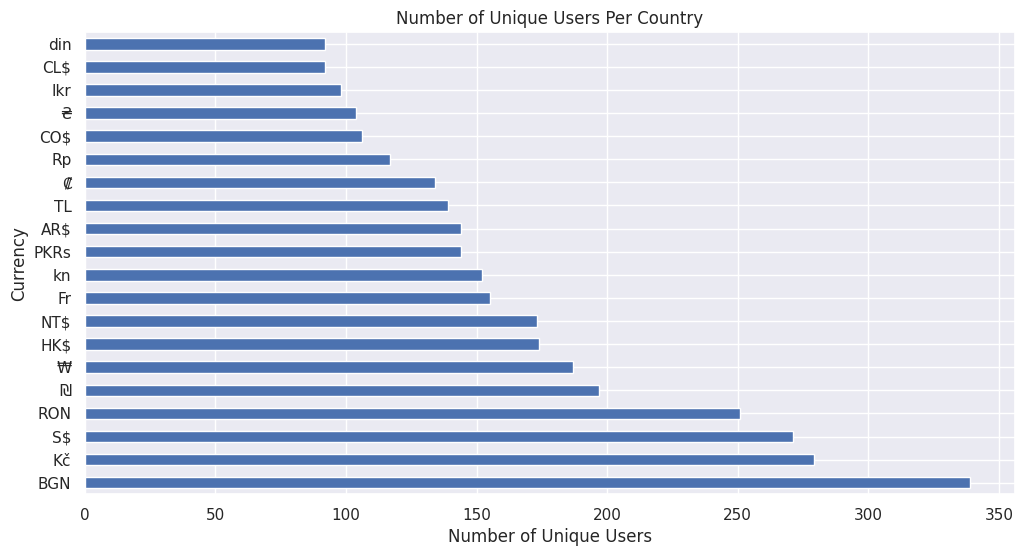

In [51]:
unq_users_per_country['Currency'].value_counts()[20:40].plot(kind='barh')
plt.title("Number of Unique Users Per Country")
plt.xlabel("Number of Unique Users")
plt.ylabel("Currency")
plt.show()

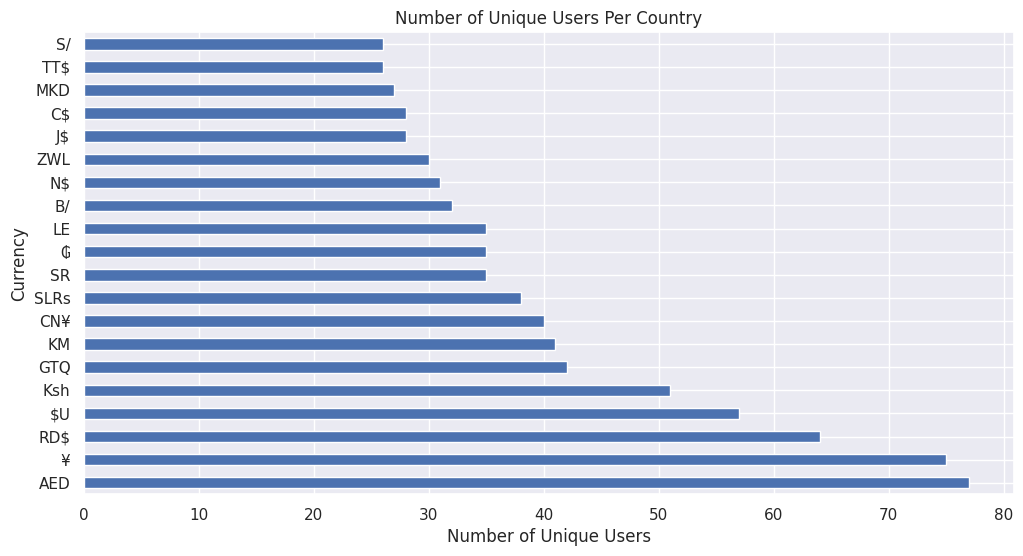

In [52]:
unq_users_per_country['Currency'].value_counts()[40:60].plot(kind='barh')
plt.title("Number of Unique Users Per Country")
plt.xlabel("Number of Unique Users")
plt.ylabel("Currency")
plt.show()

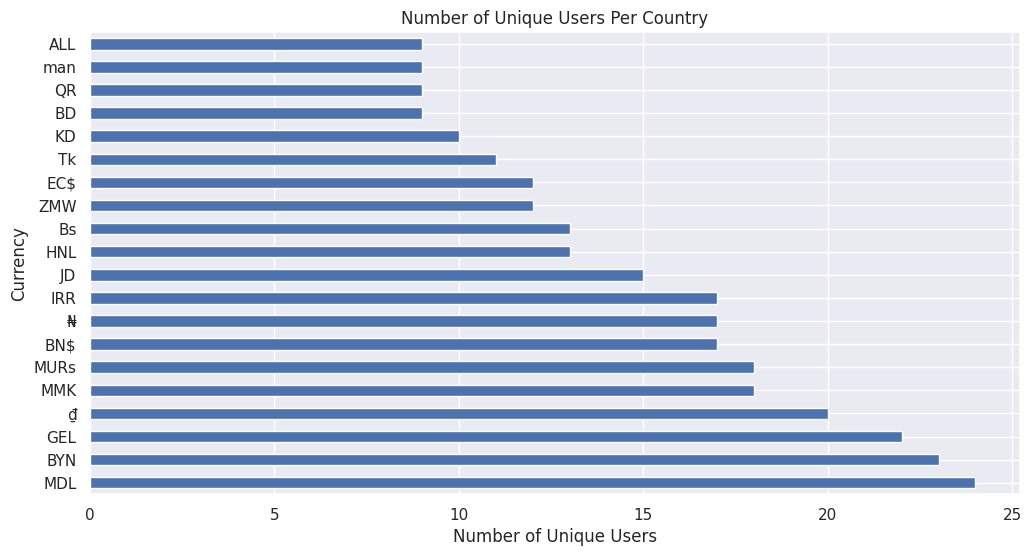

In [53]:
unq_users_per_country['Currency'].value_counts()[60:80].plot(kind='barh')
plt.title("Number of Unique Users Per Country")
plt.xlabel("Number of Unique Users")
plt.ylabel("Currency")
plt.show()

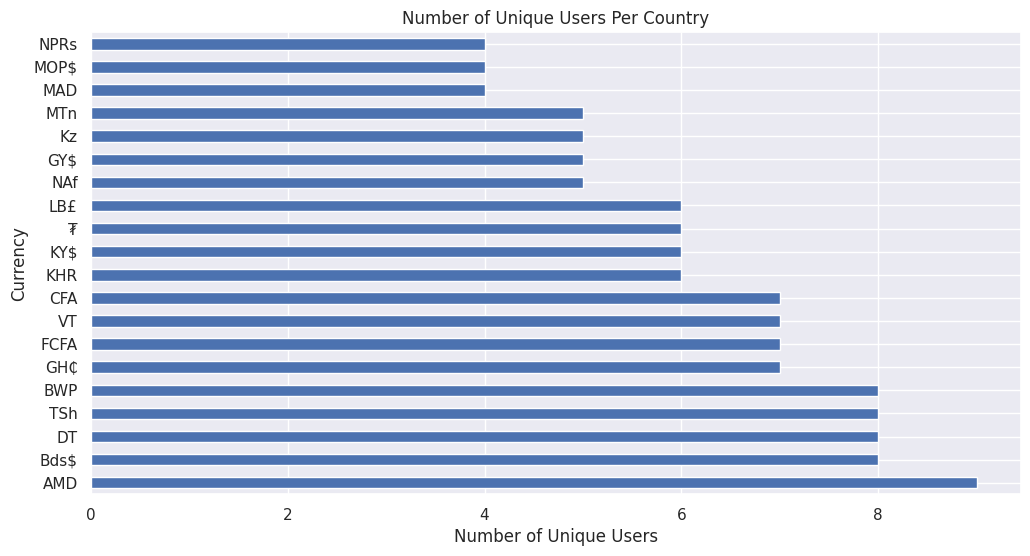

In [54]:
unq_users_per_country['Currency'].value_counts()[80:100].plot(kind='barh')
plt.title("Number of Unique Users Per Country")
plt.xlabel("Number of Unique Users")
plt.ylabel("Currency")
plt.show()

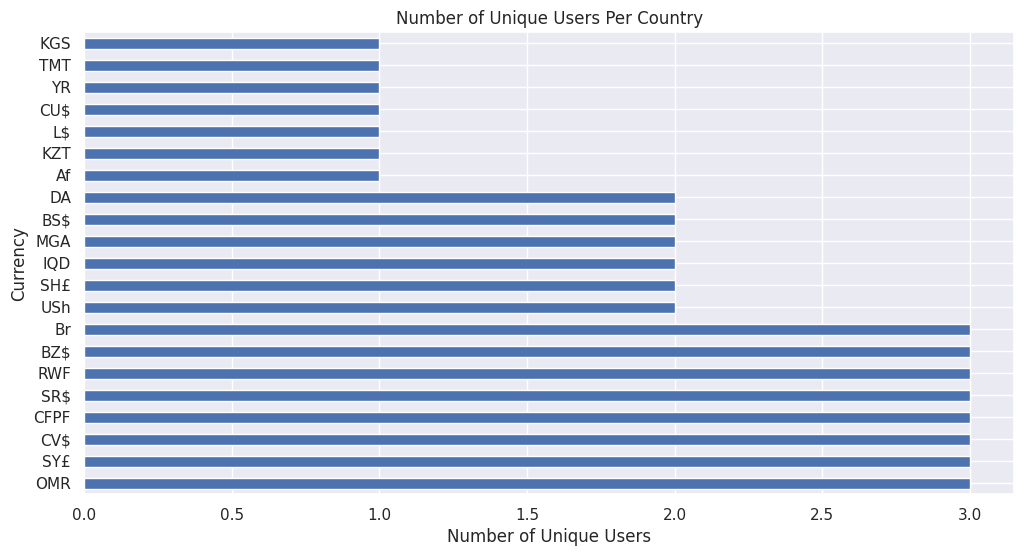

In [55]:
unq_users_per_country['Currency'].value_counts()[100:121].plot(kind='barh')
plt.title("Number of Unique Users Per Country")
plt.xlabel("Number of Unique Users")
plt.ylabel("Currency")
plt.show()

2. Look at the popularity of the app: plot the number of unique users per
day. [2]


In [56]:
df.head()

,user_ID,date_fueled,date_captured,odometer,gallons,cost_per_gallon,float_cpg,total_spent,Currency,float_tot_spent,mpg,miles,user_url,car_make,car_model,car_year,litres_filled,km_driven,litres_per_100km
0,674857,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,suzuki,swift,2015,NaN,NaN,NaN
1,461150,2012-11-07,2016-08-30,11983.0,12.12,$5.599,5.599,$67.86,$,67.86,31.6,382.992,https://www.somewebsite.com/bmw/x3/2009/461150,bmw,x3,2009,45.87919082208,612.7872000000001,7.48696950949367
2,133501,2012-09-22,2012-09-28,98233.0,7.991,£5.45,5.45,£43.53,£,43.53,28.5,227.74349999999998,https://www.somewebsite.com/mercedes-benz/e300...,mercedes-benz,e300,1998,30.249225565944,364.3896,8.301341631578946
3,247233,2019-05-04,2019-05-04,163802.0,10.575,£5.11,5.11,£54.00,£,54.0,46.8,494.9099999999999,https://www.somewebsite.com/bmw/320d/2010/247233,bmw,320d,2010,40.0307296158,791.8559999999999,5.055304198717949
4,1038865,2022-02-15,2022-02-15,NaN,11.651,$3.029,3.029,$35.29,$,35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,honda,passport,2019,44.103832695384,391.04,11.278598786667347


In [57]:
un_users_per_day = df.groupby(['user_ID', 'date_captured']).date_captured.count().reset_index(name='count')

<Axes: xlabel='date_captured', ylabel='count'>

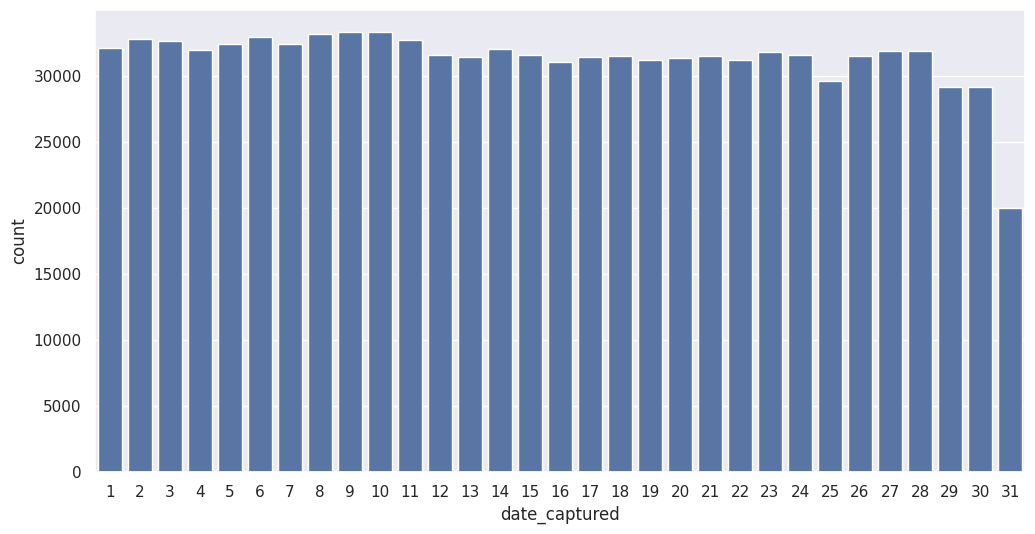

In [58]:
sns.countplot(x=un_users_per_day['date_captured'].dt.day, data=un_users_per_day)

The number of unique users per day is generally lower for the 31st and the highest from the 8th to the 10th

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1174300 entries, 0 to 1174869
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   user_ID           1174300 non-null  object        
 1   date_fueled       1174300 non-null  datetime64[ns]
 2   date_captured     1174300 non-null  datetime64[ns]
 3   odometer          1025263 non-null  float64       
 4   gallons           1100129 non-null  float64       
 5   cost_per_gallon   1093581 non-null  object        
 6   float_cpg         1093581 non-null  float64       
 7   total_spent       1100129 non-null  object        
 8   Currency          1174300 non-null  object        
 9   float_tot_spent   1100129 non-null  float64       
 10  mpg               1100129 non-null  float64       
 11  miles             1100129 non-null  float64       
 12  user_url          1174300 non-null  object        
 13  car_make          1174300 non-null  object     

3. Look at the distribution of age of the vehicles per country - look at the
year of the vehicle. Remember to look at the date it was refuelled, not
the current date. [3]


In [60]:
df['car_year'] = pd.to_numeric(df['car_year'], errors='coerce')

In [61]:
df['vehicle_age'] = df['date_fueled'].dt.year - df['car_year']

In [62]:
# percent of negative values
np.sum((df['vehicle_age'] < 0).values.ravel())/len(df)

np.float64(0.005861364216980329)

In [63]:
df['vehicle_age'] = np.where(df['vehicle_age'] < 0, np.nan, df['vehicle_age'])

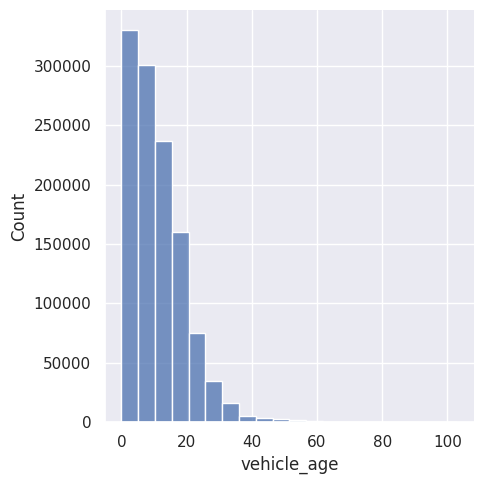

In [67]:
sns.displot(data=df, x= df['vehicle_age'], bins=20)

4. Which makes and models of vehicles are the most popular? [2]

In [68]:
most_popular_vehicle = df.groupby(['car_make', 'car_model']).car_make.count().reset_index(name='count')
most_popular_vehicle.nlargest(n=10, columns=['count'])

,car_make,car_model,count
692,honda,civic,8082
1937,toyota,4runner,7810
1972,toyota,corolla,7737
565,ford,f-150,7661
676,honda,accord,7633
627,ford,mustang,7520
642,ford,ranger,7424
2013,toyota,land_cruiser,7388
1964,toyota,camry,7316
888,jeep,wrangler,7061


### 4. Fuel Usage

#### 4.1. Outlier Removal

1. Identify the top 5 currencies by number of transactions. [2]

In [69]:
# consistency reasons - cost per gallon is converted to cost per litre
# divide fuel price (U.S. gallon) by 3.785411784 to get cost per litre
df['float_cpl'] = df['float_cpg']/3.785411784

In [70]:
# top 5 currencies with most entries
# Replace the string 'nan' with real NaN
df['Currency'] = df['Currency'].replace('nan', np.nan)

# Now count top 5 currencies ignoring NaNs
top_currencies = df['Currency'].value_counts(dropna=True).head(5).rename_axis('Currency').reset_index(name='count')

print(top_currencies)
df['Currency'].value_counts().rename_axis('Currency')[:5].reset_index(name='count')

  Currency   count
0        $  741953
1        £   87587
2        €   59273
3      CA$   46848
4        R   36424


,Currency,count
0,$,741953
1,£,87587
2,€,59273
3,CA$,46848
4,R,36424


In [71]:
# top 5 countries
top_5_currency_data = df[df['Currency'].isin(['$', '£', '€', 'CA$', 'R'])] 

In [72]:
len(df)

1174300

In [73]:
len(top_5_currency_data)

972085

2. For each of the top 5 currencies separately, remove outliers by considering
the total spend, litres, cost per litre, gallons, etc. Choose values you
believe are reasonable and provide your reasoning. As an example of
something you would want to look out for, there are some SA users that
have their currency set to dollars. This will show a user refuelling with
several hundred dollars, but only putting in tens of litres, which is clearly
wrong. [10]

In [74]:
df.head()

,user_ID,date_fueled,date_captured,odometer,gallons,cost_per_gallon,float_cpg,total_spent,Currency,float_tot_spent,...,miles,user_url,car_make,car_model,car_year,litres_filled,km_driven,litres_per_100km,vehicle_age,float_cpl
0,674857,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,suzuki,swift,2015.0,NaN,NaN,NaN,7.0,NaN
1,461150,2012-11-07,2016-08-30,11983.0,12.12,$5.599,5.599,$67.86,$,67.86,...,382.992,https://www.somewebsite.com/bmw/x3/2009/461150,bmw,x3,2009.0,45.87919082208,612.7872000000001,7.48696950949367,3.0,1.479099321153273
2,133501,2012-09-22,2012-09-28,98233.0,7.991,£5.45,5.45,£43.53,£,43.53,...,227.74349999999998,https://www.somewebsite.com/mercedes-benz/e300...,mercedes-benz,e300,1998.0,30.249225565944,364.3896,8.301341631578946,14.0,1.439737685351909
3,247233,2019-05-04,2019-05-04,163802.0,10.575,£5.11,5.11,£54.00,£,54.0,...,494.9099999999999,https://www.somewebsite.com/bmw/320d/2010/247233,bmw,320d,2010.0,40.0307296158,791.8559999999999,5.055304198717949,9.0,1.3499191875501386
4,1038865,2022-02-15,2022-02-15,NaN,11.651,$3.029,3.029,$35.29,$,35.29,...,244.4,https://www.somewebsite.com/honda/passport/201...,honda,passport,2019.0,44.103832695384,391.04,11.278598786667347,3.0,0.8001771465928316


Boxplot for outlier detection

The boxplot captures the summary of the data effectively and efficiently with only a simple box and whiskers. The whiskers can be used to represent one standard deviation from the mean, or the top and bottom percentiles which is great for highlighting outliers. In this case an outlier is defined as a data point that is located outside the whiskers of the box plot

Before removal of outliers

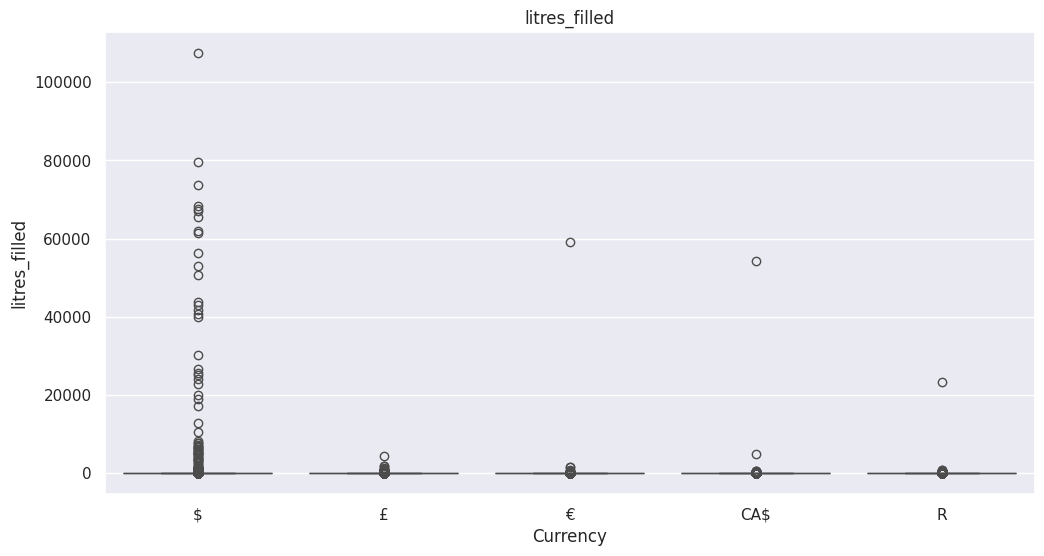

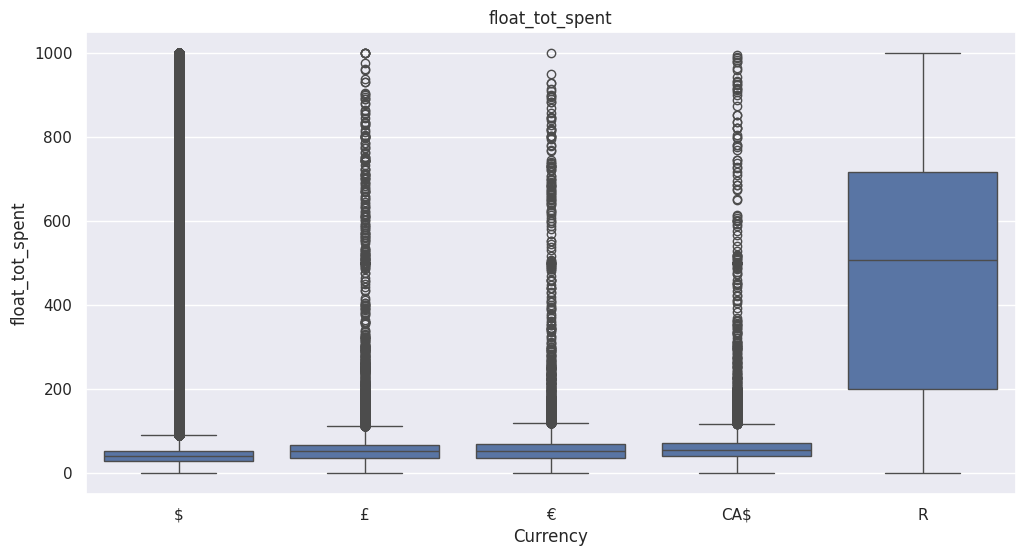

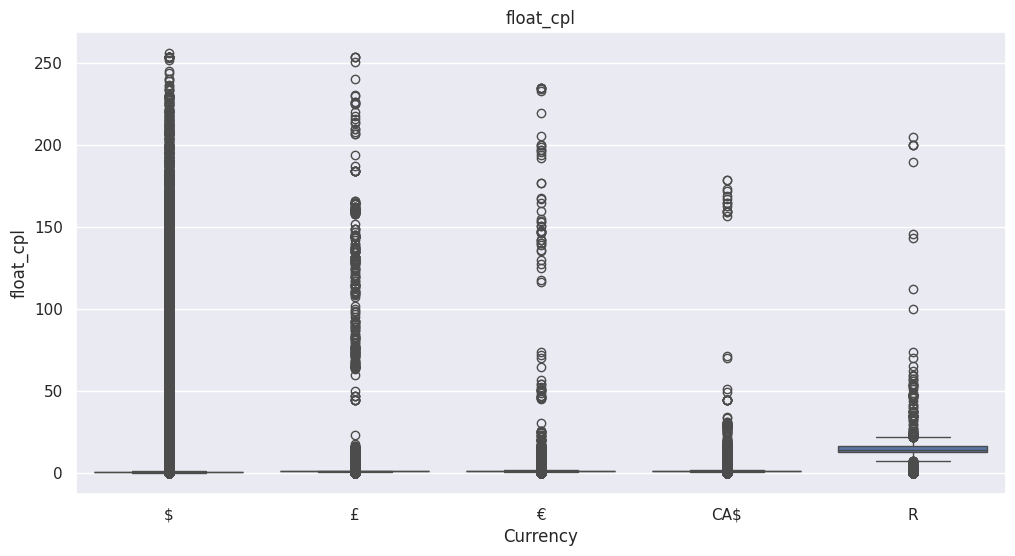

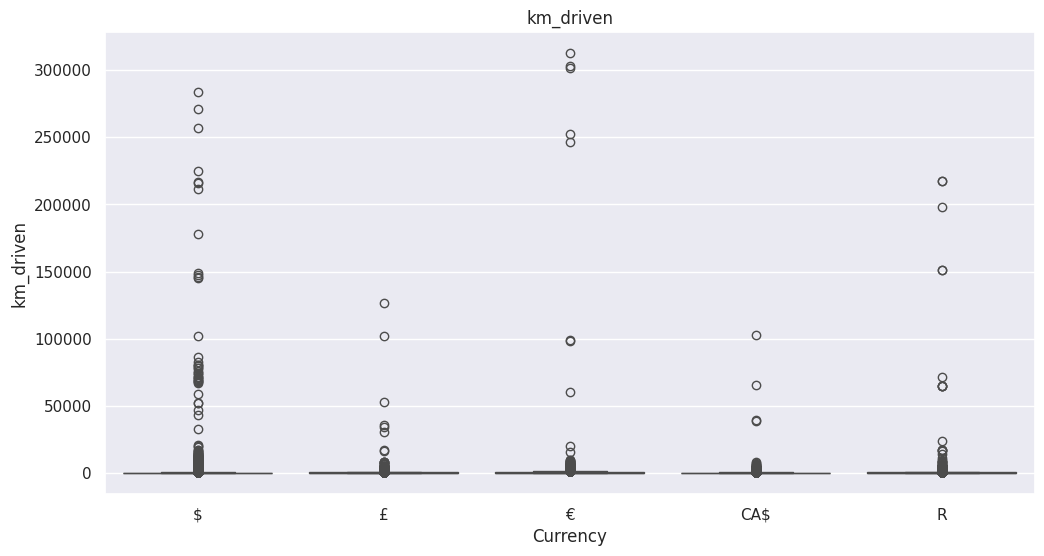

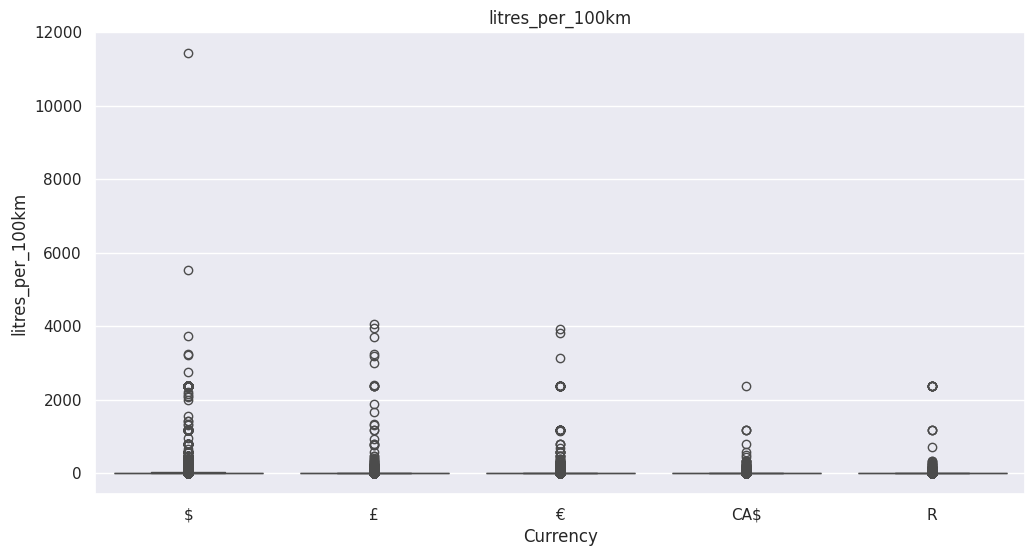

In [75]:
columns = ['litres_filled', 'float_tot_spent', 'float_cpl', 'km_driven', 'litres_per_100km']
for value in columns:
    plt.figure()             
    sns.boxplot(x="Currency", y=value, data=top_5_currency_data)
    plt.title(value)

IQR (Inter Quartile Range)

IQR is commonly used and most trusted to find outliers in statistics

For Dollars - $

In [76]:
df1 = top_5_currency_data[top_5_currency_data['Currency'].isin(['$'])]
len(df1)

741953

In [77]:
for column in df1[columns]:
    df1_Q1 = df1[column].describe()['25%']
 
    df1_Q3 = df1[column].describe()['75%']
    df1_IQR = df1_Q3 - df1_Q1

    # Any number greater than this is a suspected outlier.
    df1_ub = (df1_Q3 +1.5*df1_IQR)

    # Any number less than this is a suspected outlier.
    df1_lb = (df1_Q1 -1.5*df1_IQR)

    # remove outliers by taking values within the bounds
    df1 = df1[(df1[column] <= df1_ub) & (df1[column] >= df1_lb)]

# numeric_cols = df1.select_dtypes(include=[np.number]).columns

# for column in numeric_cols:
#     Q1 = df1[column].quantile(0.25)
#     Q3 = df1[column].quantile(0.75)
#     IQR = Q3 - Q1

#     # Upper & lower bounds
#     ub = Q3 + 1.5 * IQR
#     lb = Q1 - 1.5 * IQR

#     df1 = df1[(df1[column] <= ub) & (df1[column] >= lb)]


/home/tarunaidoo/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/tarunaidoo/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [78]:
df1[columns].describe()

,litres_filled,float_tot_spent,float_cpl,km_driven,litres_per_100km
count,552309.0,552309.0,552309.0,552309.0,552309.0
mean,47.36771443219849,40.62532194840207,0.8634975190724042,439.4000743835787,11.354905291410047
std,14.744710462195219,15.203271745994414,0.2043151587777024,138.7343754183753,3.5975601619692505
min,2.751994366968,1.54,0.28239992397086067,16.0,0.5243173960366329
25%,37.17274371888,29.66,0.7262089719325501,347.5489600000001,8.82791927238806
50%,47.094308004744,39.24,0.8450863954937168,437.12,10.803115821917809
75%,56.978018172767996,50.09,0.9932869168666381,526.3104000000001,13.366567033898304
max,91.107290817312,88.72,1.4658907185353658,850.22784,24.211973611394363


In [79]:
len(df1)

552309

For Pounds £

In [80]:
df2 = top_5_currency_data[top_5_currency_data['Currency'].isin(['£'])] 
len(df2)

87587

In [81]:
for column in df2[columns]:
    df2_Q1 = df2[column].describe()['25%']
 
    df2_Q3 = df2[column].describe()['75%']
    df2_IQR = df2_Q3 - df2_Q1

    # Any number greater than this is a suspected outlier.
    df2_ub = (df2_Q3 +1.5*df2_IQR)

    # Any number less than this is a suspected outlier.
    df2_lb = (df2_Q1 -1.5*df2_IQR)

    # remove outliers by taking values within the bounds
    df2 = df2[(df2[column] <= df2_ub) & (df2[column] >= df2_lb)]

df2[columns].describe()

/home/tarunaidoo/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/tarunaidoo/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,litres_filled,float_tot_spent,float_cpl,km_driven,litres_per_100km
count,70409.0,70409.0,70409.0,70409.0,70409.0
mean,43.191129747789354,54.68891689982814,1.2667528473615985,574.9539471510744,7.960410890334079
std,14.212582553238526,18.846143117721166,0.13016726961201275,210.99932130194622,2.4638825101668824
min,0.098420706384,0.13,0.8638426112111454,1.6,0.06600101018240342
25%,32.959580403288,40.8,1.167640471423016,424.0,6.177238550913837
50%,43.36189198572,54.19,1.2680258513191123,555.2012800000001,7.439881650943395
75%,53.10932732952,67.62,1.357844349120883,718.6508800000001,9.301885323260867
max,85.78878726079199,111.59,1.6537170477620091,1197.42,16.881371160789474


For Euro - €

In [82]:
df3 = top_5_currency_data[top_5_currency_data['Currency'].isin(['€'])] 
len(df3)

59273

In [83]:
for column in df3[columns]:
    df3_Q1 = df3[column].describe()['25%']
 
    df3_Q3 = df3[column].describe()['75%']
    df3_IQR = df3_Q3 - df3_Q1

    # Any number greater than this is a suspected outlier.
    df3_ub = (df3_Q3 +1.5*df3_IQR)

    # Any number less than this is a suspected outlier.
    df3_lb = (df3_Q1 -1.5*df3_IQR)

    # remove outliers by taking values within the bounds
    df3 = df3[(df3[column] <= df3_ub) & (df3[column] >= df3_lb)]

df3[columns].describe()
# len(df3)

/home/tarunaidoo/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/tarunaidoo/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,litres_filled,float_tot_spent,float_cpl,km_driven,litres_per_100km
count,43718.0,43718.0,43718.0,43718.0,43718.0
mean,42.49140347840239,58.43568347133903,1.387856501040202,590.4496746164052,7.611871583522523
std,14.211276695413236,20.271225444613005,0.22265019742000872,217.73700190225162,2.3876192813233215
min,1.018275769896,1.71,0.74760690817356,15.52,0.1544228066949632
25%,33.00879075648,45.0225,1.2389669255597162,439.10983999999996,6.020056908396947
50%,42.601024217136,58.11,1.3789781133095347,577.92352,7.126151701807228
75%,52.112817677382,71.99,1.537481344724424,735.2889600000001,8.666235769230768
max,83.839300192032,119.37,2.0156327594926724,1312.9792,19.079696491935486


For CA - Canadian Dollar

In [84]:
df4 = top_5_currency_data[top_5_currency_data['Currency'].isin(['CA$'])] 
len(df4)

46848

In [85]:
for column in df4[columns]:
    df4_Q1 = df4[column].describe()['25%']
 
    df4_Q3 = df4[column].describe()['75%']
    df4_IQR = df4_Q3 - df4_Q1

    # Any number greater than this is a suspected outlier.
    df4_ub = (df4_Q3 +1.5*df4_IQR)

    # Any number less than this is a suspected outlier.
    df4_lb = (df4_Q1 -1.5*df4_IQR)

    # remove outliers by taking values within the bounds
    df4 = df4[(df4[column] <= df4_ub) & (df4[column] >= df4_lb)]

df4[columns].describe()

/home/tarunaidoo/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/tarunaidoo/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,litres_filled,float_tot_spent,float_cpl,km_driven,litres_per_100km
count,37846.0,37846.0,37846.0,37846.0,37846.0
mean,44.0330564173655,57.39868968979549,1.3090742207188526,423.02273671193785,10.935978851399524
std,13.69295841667708,19.8702651390208,0.23130306886437732,137.12281101193625,3.2783349447502106
min,3.573428724096,4.8,0.6683552924661155,26.758080000000003,0.9457562543568726
25%,34.738723941768,43.1125,1.1491484277579456,331.22880000000004,8.55073832717888
50%,43.869137164776,56.25,1.3102933796964162,420.04584,10.515032733333332
75%,53.29859791872,70.62,1.4529462879698163,509.72212,12.866210263703653
max,84.83107807944,115.22,1.9284559822144833,823.68,22.11105014018692


For Rands - R

In [86]:
df5 = top_5_currency_data[top_5_currency_data['Currency'].isin(['R'])] 
len(df5)

36424

In [87]:
for column in df5[columns]:
    df5_Q1 = df5[column].describe()['25%']
 
    df5_Q3 = df5[column].describe()['75%']
    df5_IQR = df5_Q3 - df5_Q1

    # Any number greater than this is a suspected outlier.
    df5_ub = (df5_Q3 +1.5*df5_IQR)

    # Any number less than this is a suspected outlier.
    df5_lb = (df5_Q1 -1.5*df5_IQR)

    # remove outliers by taking values within the bounds
    df5 = df5[(df5[column] <= df5_ub) & (df5[column] >= df5_lb)]
    
df5[columns].describe()

/home/tarunaidoo/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/tarunaidoo/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,litres_filled,float_tot_spent,float_cpl,km_driven,litres_per_100km
count,27758.0,27758.0,27758.0,27758.0,27758.0
mean,49.458911337496644,519.1328154045681,14.842777709877543,517.5495200576411,10.013229064304351
std,17.534207907771137,301.5040572399834,2.685194495309373,178.15433512579548,3.219721483328888
min,0.060566588544,0.79,7.299073806655641,0.96,0.17737596562293276
25%,36.941833600056,349.03999999999996,12.84932862670034,397.6386,7.771101191702154
50%,48.987013896743996,576.565,14.471345028179371,513.3688,9.539848245967741
75%,60.899704780992,750.5174999999999,16.4790526261013,632.9946000000001,11.597462573529413
max,102.21368899156799,999.99,21.96854787410362,1093.928,24.0445302565723


After removing outliers

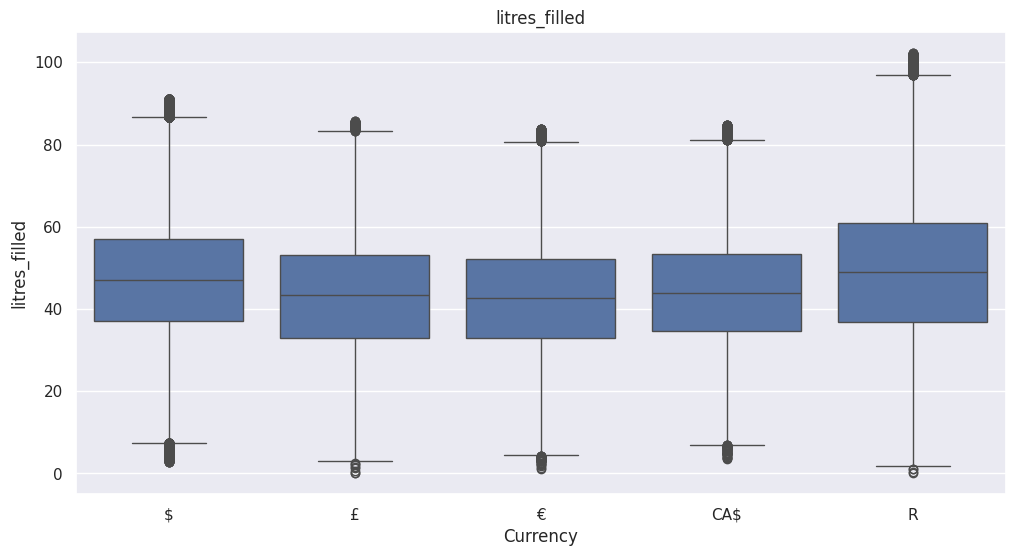

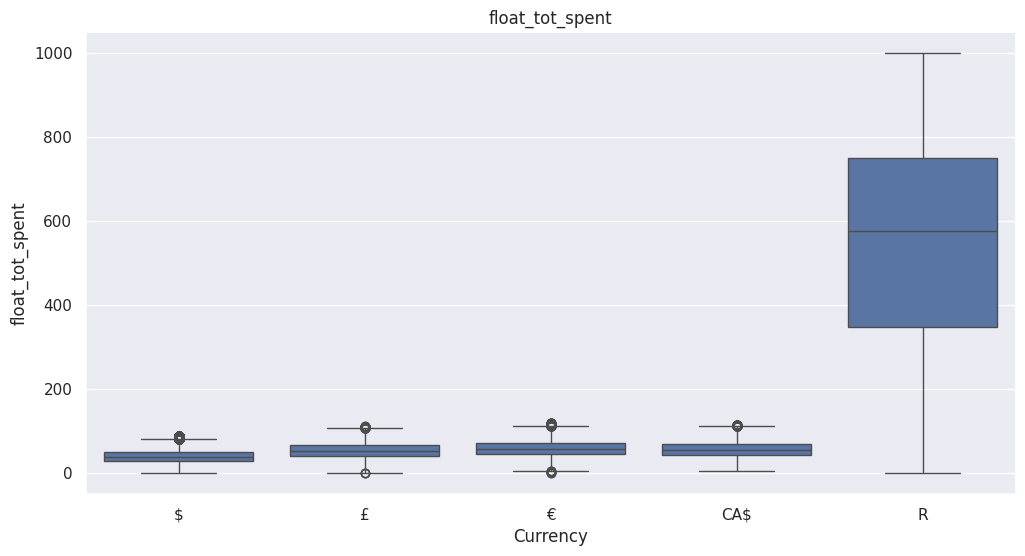

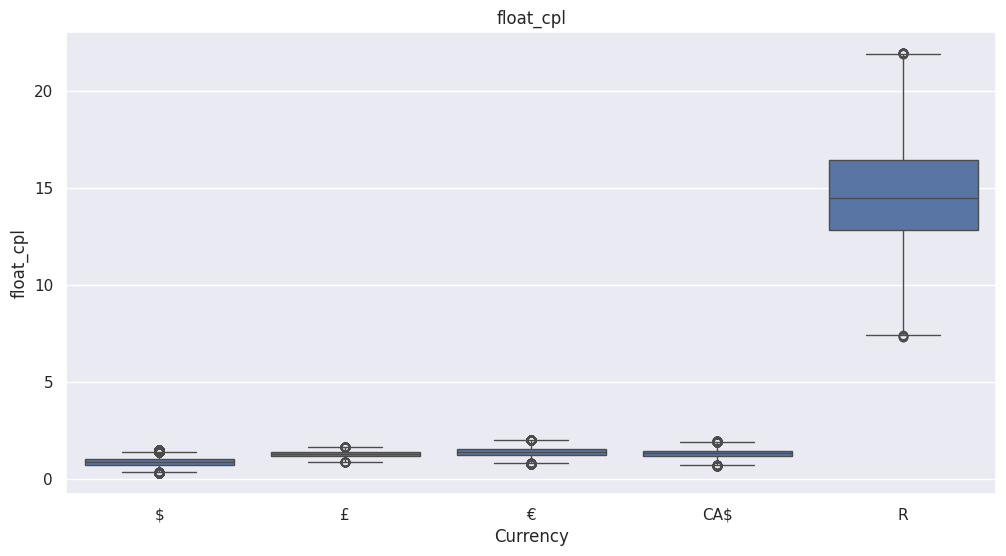

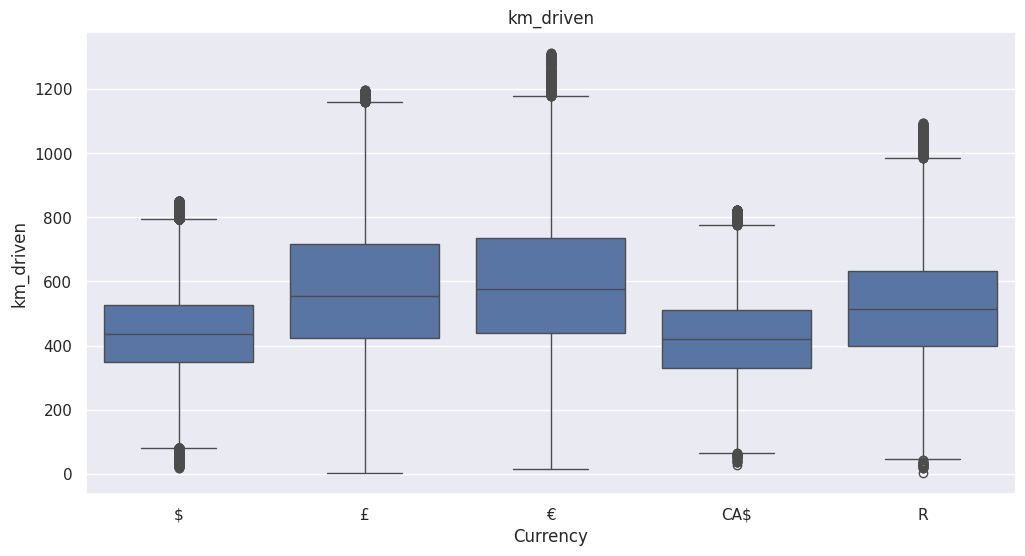

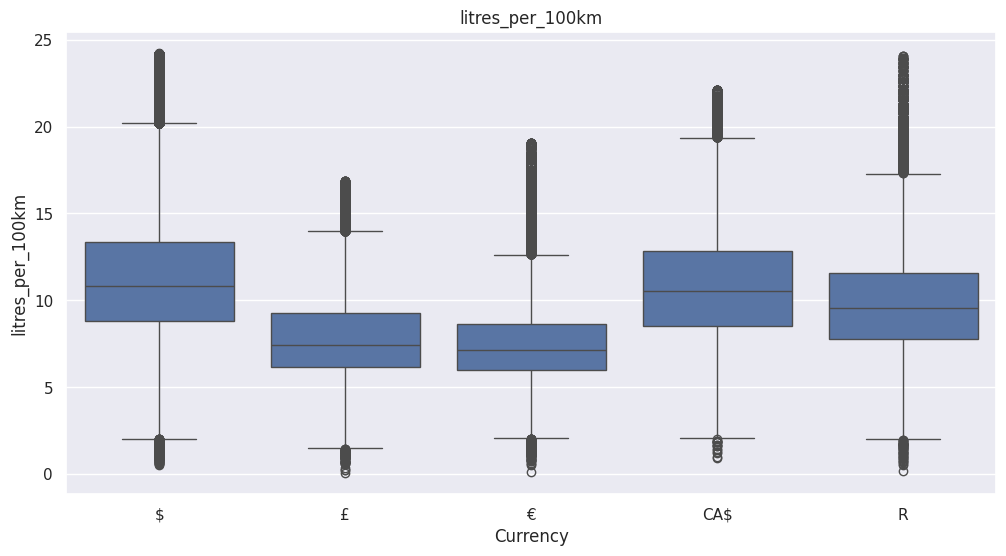

In [88]:
top_5_currency_data_removed_outliers = pd.concat([df1, df2, df3, df4, df5], axis=0)

for value in columns:
    plt.figure()             
    sns.boxplot(x="Currency", y=value, data=top_5_currency_data_removed_outliers)
    plt.title(value)

3. How many values have been removed after accounting for outliers? [1]

In [89]:
values_removed = len(top_5_currency_data) - len(top_5_currency_data_removed_outliers)
print("Number of Values removed after accounting for outliers:", values_removed)

Number of Values removed after accounting for outliers: 240045


In [90]:
print("Percentage of removed values:", values_removed/len(top_5_currency_data) * 100)

Percentage of removed values: 24.693828214610864


#### 4.2. Fuel Efficiency

In [91]:
len(top_5_currency_data_removed_outliers)

732040

In [92]:
top_5_currency_data_removed_outliers.head()

,user_ID,date_fueled,date_captured,odometer,gallons,cost_per_gallon,float_cpg,total_spent,Currency,float_tot_spent,...,miles,user_url,car_make,car_model,car_year,litres_filled,km_driven,litres_per_100km,vehicle_age,float_cpl
4,1038865,2022-02-15,2022-02-15,NaN,11.651,$3.029,3.029,$35.29,$,35.29,...,244.4,https://www.somewebsite.com/honda/passport/201...,honda,passport,2019.0,44.103832695384,391.04,11.278598786667347,3.0,0.8001771465928316
5,445811,2021-10-23,2021-10-23,147567.0,3.413,$3.739,3.739,$12.76,$,12.76,...,98.97699999999999,https://www.somewebsite.com/volkswagen/passat/...,volkswagen,passat,2004.0,12.919610418791999,158.3632,8.158215051724136,17.0,0.9877393037671169
6,529810,2021-11-20,2021-12-12,105929.0,9.044,$4.639,4.639,$41.96,$,41.96,...,266.798,https://www.somewebsite.com/mazda/3_sport/2010...,mazda,3_sport,2010.0,34.235264174496,426.8768,8.019940220338984,11.0,1.2254941508894506
7,1087864,2022-01-20,2022-01-20,59475.0,14.962,$2.929,2.929,$43.82,$,43.82,...,408.4626,https://www.somewebsite.com/subaru/forester/20...,subaru,forester,2020.0,56.637331112207995,653.54016,8.666235769230768,2.0,0.7737599413570166
11,968116,2022-01-14,2022-01-14,22823.0,13.761,$2.599,2.599,$35.76,$,35.76,...,288.981,https://www.somewebsite.com/honda/pilot/2019/9...,honda,pilot,2019.0,52.091051559624,462.3696,11.266106500000001,3.0,0.6865831640788278


1. Look at the difference in cost per litre per country for January 2022 -
use the average currency conversion rate to Rands (quote your values and
source). Are there any notable differences? Discuss reasons why this
may/may not be the case. [5]

In [93]:
# copying top 5 currency dataframe
df_copy = top_5_currency_data_removed_outliers.copy()

In [94]:
# Creating a rands conversion column 
df_copy['cpl_rands'] = df_copy['float_cpl']

In [95]:
# Converting currencies to Rands using the  average currency conversion rate to Rands
# These are the exchange rates as off 2 Sept 2025 @ 14:55 according to Google. Promt "Rands to _____ (currency) exchange rate"

# average dollar rand exchange rate: 17.62 ZAR
df_copy['cpl_rands'][df_copy['Currency'].isin(['$'])] = df_copy['cpl_rands']*17.62

# average Pound Sterling rand exchange rate: 23.71 ZAR
df_copy['cpl_rands'][df_copy['Currency'].isin(['£'])] = df_copy['cpl_rands']*23.71

# average Euro rand exchange rate: 20.64 ZAR
df_copy['cpl_rands'][df_copy['Currency'].isin(['€'])] = df_copy['cpl_rands']*20.64 

# average Canadian dollar rand exchange rate: 12.87 ZAR
df_copy['cpl_rands'][df_copy['Currency'].isin(['CA$'])] = df_copy['cpl_rands']*12.87

In [96]:
currency_values = ['R', '$', '£', '€', 'CA$']

January 2022

In [97]:
# Filtering out January 2022
jan_22_df = df_copy[df_copy['date_fueled'].dt.to_period('M') == '2022-01']

<Axes: xlabel='Currency', ylabel='cpl_rands'>

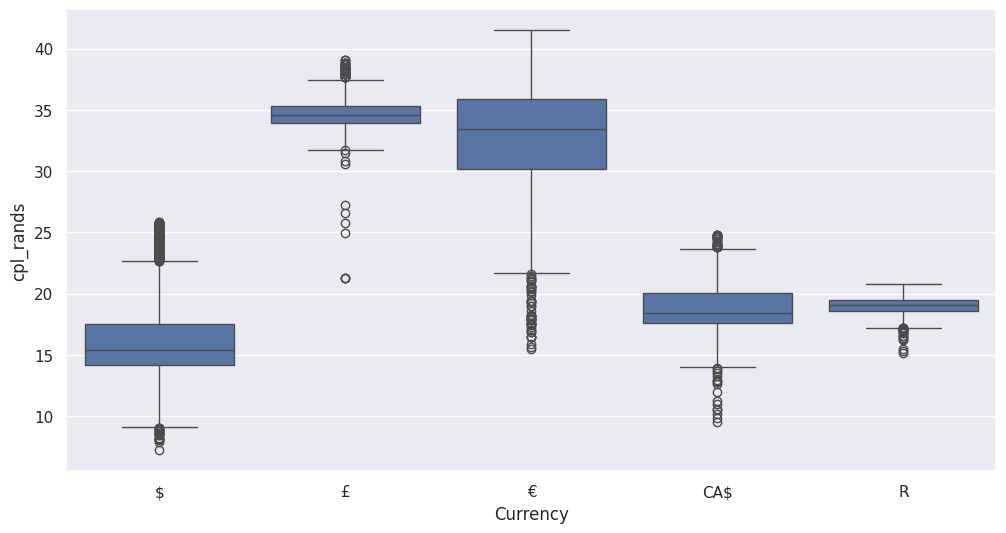

In [98]:
# Boxplot to observe the difference in cost per litre per country for January 2022
sns.boxplot(x="Currency", y='cpl_rands', data=jan_22_df)

In [99]:
for cv in currency_values:
    print(cv, "\n",jan_22_df['cpl_rands'][jan_22_df['Currency'].isin([cv])].describe())

R 
 count                730.0
mean    18.912974689538817
std     0.8352445540143704
min     15.150267202739812
25%      18.58450388339574
50%      19.05473013659325
75%     19.515049937827317
max      20.79034052058628
Name: cpl_rands, dtype: float64
$ 
 count              30552.0
mean    16.154555381591134
std     2.8236065366275556
min      7.210148210390841
25%     14.145668438591201
50%     15.355893444854347
75%      17.54360787925312
max     25.828994460593147
Name: cpl_rands, dtype: float64
£ 
 count                897.0
mean      34.6637964873061
std     1.6063862013697623
min     21.295965828799776
25%      33.88563974523729
50%      34.57462687499258
75%     35.326249198361985
max        39.084360815209
Name: cpl_rands, dtype: float64
€ 
 count                935.0
mean    32.625435844739485
std      5.158663304643788
min        15.485131696309
25%     30.206911830123897
50%     33.423893414920485
75%      35.87752343722297
max      41.49360993271532
Name: cpl_rands, dtype: 

2. Looking at the odometer readings, find examples of where users have
missed logging a fill-up. Give a basic rule for identifying this, and estimate how many there are in the dataset. [5]

In [100]:
# odometer: an instrument for measuring the distance travelled by a wheeled vehicle.
df_copy['odometer'].isnull().sum()

np.int64(113454)

In [101]:
# example of missing odometer readings
df_copy[df_copy['odometer'].isnull()].sample(10)

,user_ID,date_fueled,date_captured,odometer,gallons,cost_per_gallon,float_cpg,total_spent,Currency,float_tot_spent,...,user_url,car_make,car_model,car_year,litres_filled,km_driven,litres_per_100km,vehicle_age,float_cpl,cpl_rands
411799,243027,2021-08-09,2021-08-09,NaN,9.496,$4.259,4.259,$40.44,$,40.44,...,https://www.somewebsite.com/mazda/mx-5_miata/2...,mazda,mx-5_miata,2006.0,35.946270300864,453.44,7.927459046591391,15.0,1.1251087709933543,19.824416544902903
771257,206469,2017-03-23,2017-09-07,NaN,14.593,R48.23,48.23,R703.76,R,703.76,...,https://www.somewebsite.com/mercedes-benz/c220...,mercedes-benz,c220,2007.0,55.240514163911996,693.2800000000001,7.967994773239094,10.0,12.741018085233497,12.741018085233497
475340,438657,2021-10-26,2021-10-26,NaN,9.044,$3.559,3.559,$32.19,$,32.19,...,https://www.somewebsite.com/bmw/x5/2016/438657,bmw,x5,2016.0,34.235264174496,437.92,7.817698249565217,5.0,0.9401883343426503,16.5661184511175
184721,120566,2018-08-11,2018-08-31,NaN,12.354,$2.999,2.999,$37.05,$,37.05,...,https://www.somewebsite.com/mitsubishi/outland...,mitsubishi,outlander_sport,2011.0,46.764977179536,507.36000000000007,9.217316536490063,7.0,0.7922519850220872,13.959479976089176
1097789,518200,2022-03-28,2022-03-28,NaN,8.654,£6.17,6.17,£53.37,£,53.37,...,https://www.somewebsite.com/suzuki/swift/2014/...,suzuki,swift,2014.0,32.758953578736,434.72,7.53564445591093,8.0,1.6299415630497758,38.64591445991019
1032442,30340,2013-10-28,2013-10-27,NaN,12.11,$3.979,3.979,$48.19,$,48.19,...,https://www.somewebsite.com/ford/escape/2001/3...,ford,escape,2001.0,45.84133670424,290.71999999999997,15.768208827820585,12.0,1.0511405963330727,18.521097307388743
265303,317358,2014-12-05,2014-12-05,NaN,11.73,$2.569,2.569,$30.13,$,30.13,...,https://www.somewebsite.com/volkswagen/cabrio/...,volkswagen,cabrio,2002.0,44.40288022632,475.36000000000007,9.340895369050823,12.0,0.6786580025080833,11.957954004192429
583691,901442,2019-07-31,2019-07-31,NaN,19.199,$2.999,2.999,$57.58,$,57.58,...,https://www.somewebsite.com/ford/explorer/1999...,ford,explorer,1999.0,72.676120841016,495.84,14.657171837894484,20.0,0.7922519850220872,13.959479976089176
903129,435722,2021-08-03,2021-08-03,NaN,7.496,$3.099,3.099,$23.23,$,23.23,...,https://www.somewebsite.com/kia/sportage/2016/...,kia,sportage,2016.0,28.375446732864003,262.40000000000003,10.813813541487804,5.0,0.818669190257902,14.424951132344233
99551,288975,2015-12-04,2015-12-04,NaN,16.529,£4.04,4.04,£66.76,£,66.76,...,https://www.somewebsite.com/bmw/525d/2012/288975,bmw,525d,2012.0,62.569071377735995,976.8000000000001,6.405515087810809,3.0,1.0672550915269197,25.304618220103265


Basic rule:

Look for missing values. e.g. NaN in odometer reading

In [102]:
# number of missed log fill-ups
print("Number of missed log fill-up:", df_copy['odometer'].isnull().sum())
print("Percentage of missed log fill-up:",(df_copy['odometer'].isnull().sum()/len(df_copy)) * 100)

Number of missed log fill-up: 113454
Percentage of missed log fill-up: 15.498333424403038


3. Plot the average distance (in km) per tank per country. Which country
has the largest average distance? Provide some explanations for why this
might be the case. [5]


Text(0.5, 1.0, 'Average Distance (in km) per tank per country')

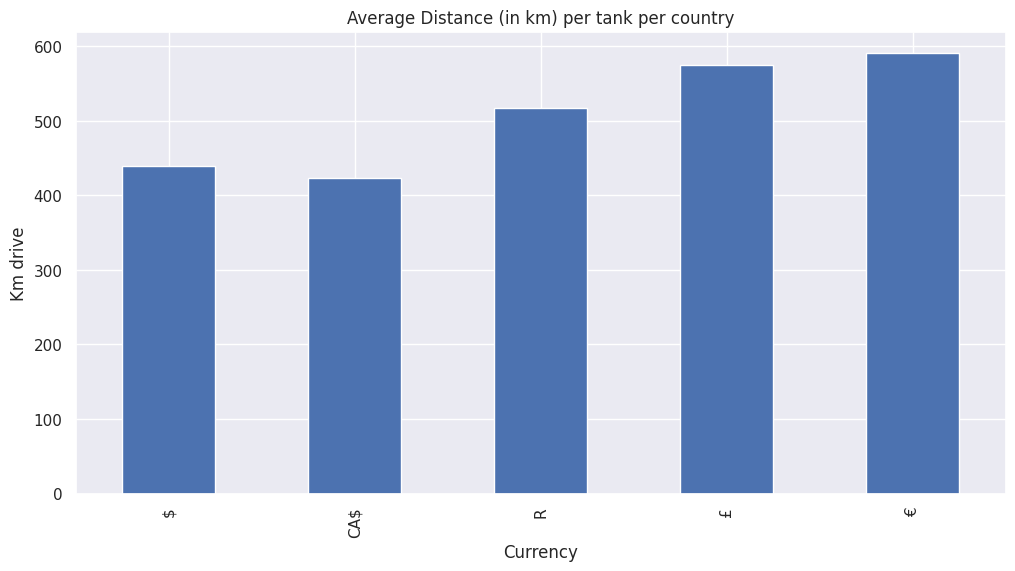

In [103]:
df_copy[['Currency', 'km_driven']].groupby('Currency')['km_driven'].mean().plot(kind='bar')
plt.ylabel("Km drive")
plt.title("Average Distance (in km) per tank per country")

€. has the largest average distance. The reason for this might be that cars in other countries are simply not as fuel-efficient as those in €. These cars are designed to accommodate €. gas prices, which are probably far higher than other countries gas prices. As a result, €. vehicles allow drivers to achieve greater miles per gallon (km per litre).

4. Do newer vehicles drive further distances between fill-ups? Provide a plot
to show this. [4]

In [104]:
# Information Source: https://www.carshop.co.uk/latest-news/what-age-car-should-i-buy/
# general rule of thumb, a car is usually reliable up to 5 years providing it has been maintained. (carshop, 2021). 
# Therefore cars younger than 5 years or 5 years will be considered as newer vehicles

# Filtering vehicles with fill-ups
fillup_data2 = df_copy[df_copy['litres_per_100km'].notnull()]

# Creating vehicle age group
conditions = [
    (fillup_data2['vehicle_age'] <= 5),
    (fillup_data2['vehicle_age'] > 5) 
]

values = ['newer vehicles', 'older vehicles']

fillup_data2['vehicle_age_group'] = np.select(conditions, values, default='other')

<Axes: xlabel='vehicle_age_group'>

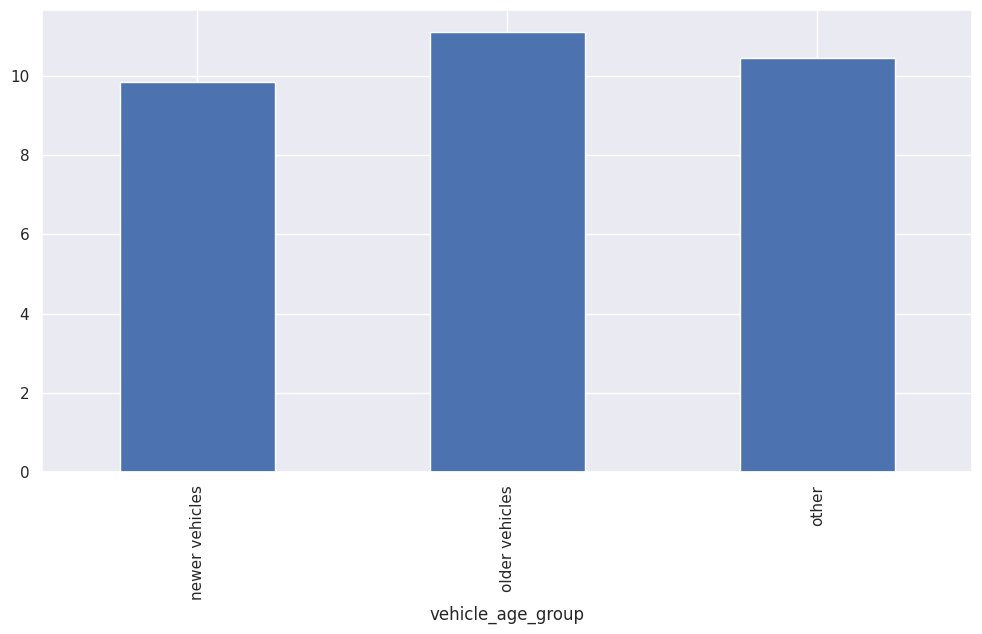

In [105]:
fillup_data2.groupby('vehicle_age_group')['litres_per_100km'].mean().plot(kind='bar')

Yes, newer vehicles drive further between fill ups compared to older vehicles as plot shown above. Reason being that vehicles with lower l/100km are the most fuel efficient as they drive further distances between fill-ups.

5. Take the top 5 most popular vehicles in SA (ie, those with currency set
to R). Compute their fuel efficiency and discuss whether these values are
realistic. [3]


In [106]:
# SA (rands - R) dataframe
# use previously filtered dataframe df5
df5.head()

,user_ID,date_fueled,date_captured,odometer,gallons,cost_per_gallon,float_cpg,total_spent,Currency,float_tot_spent,...,miles,user_url,car_make,car_model,car_year,litres_filled,km_driven,litres_per_100km,vehicle_age,float_cpl
100,123580,2013-06-06,2013-06-08,NaN,17.937,R47.05,47.05,R843.99,R,843.99,...,418.4,https://www.somewebsite.com/land_rover/discove...,land_rover,discovery,1996.0,67.898931169608,669.44,10.142646266970603,17.0,12.429295063450883
323,942891,2018-08-12,2019-08-04,41111.0,6.763,R60.19,60.19,R407.04,R,407.04,...,275.2541,https://www.somewebsite.com/ford/ecosport/2013...,ford,ecosport,2013.0,25.600739895192,440.40656,5.812978783783784,5.0,15.900515831436953
334,426622,2016-06-16,2016-06-16,2430.0,18.011,R48.45,48.45,R872.69,R,872.69,...,279.1705,https://www.somewebsite.com/land_rover/discove...,land_rover,discovery,2016.0,68.179051641624,446.67280000000005,15.263757193548386,0.0,12.799135936752291
375,445133,2022-01-31,2022-01-31,111820.0,17.055,R76.50,76.5,"R1,304.76",R,1.0,...,325.75050000000005,https://www.somewebsite.com/toyota/fortuner/20...,toyota,fortuner,2011.0,64.56019797612,521.2008000000001,12.386818664921464,11.0,20.209162005398355
393,324843,2019-06-24,2020-01-02,42255.0,11.597,R61.17,61.17,R709.42,R,709.42,...,420.9710999999999,https://www.somewebsite.com/audi/a3/2014/324843,audi,a3,2014.0,43.899420459047995,673.5537599999999,6.517582272727274,5.0,16.159404442747938


In [109]:
# Top 5 in SA
df5.groupby(['car_make', 'car_model']).car_make.count().reset_index(name='count').nlargest(n=5, columns=['count'])
#most_popular_vehicle.nlargest(n=10, columns=['count'])
#df5['car_make'].value_counts().rename_axis('car_make')[:5].reset_index(name='count')

,car_make,car_model,count
469,toyota,hilux,1053
359,mitsubishi,pajero,907
467,toyota,fortuner,855
441,suzuki,jimny,808
481,volkswagen,amarok,646


The calculation is - Divide the number of kilometers by the number of litres consumed. If you have covered 100km on the run and at refill, the vehicle has taken in five litres of fuel, your efficiency is 20kmpl.

In [110]:
top_sa_car_make = ['toyota', 'mitsubishi', 'suzuki', 'volkswagen']
top_sa_car_model = ['hilux', 'pajero', 'fortuner', 'jimny', 'amarok']

top5_sa_v = df5[df5['car_make'].isin(top_sa_car_make) & df5['car_model'].isin(top_sa_car_model)]

top5_sa_v['fuel_efficiency'] = top5_sa_v['km_driven']/top5_sa_v['litres_filled']

top5_sa_v['vehicle'] = top5_sa_v['car_make'] + " " + top5_sa_v['car_model']

Text(0.5, 1.0, 'Average Litres Per 100km Comparsion for Top 5 SA vechicles')

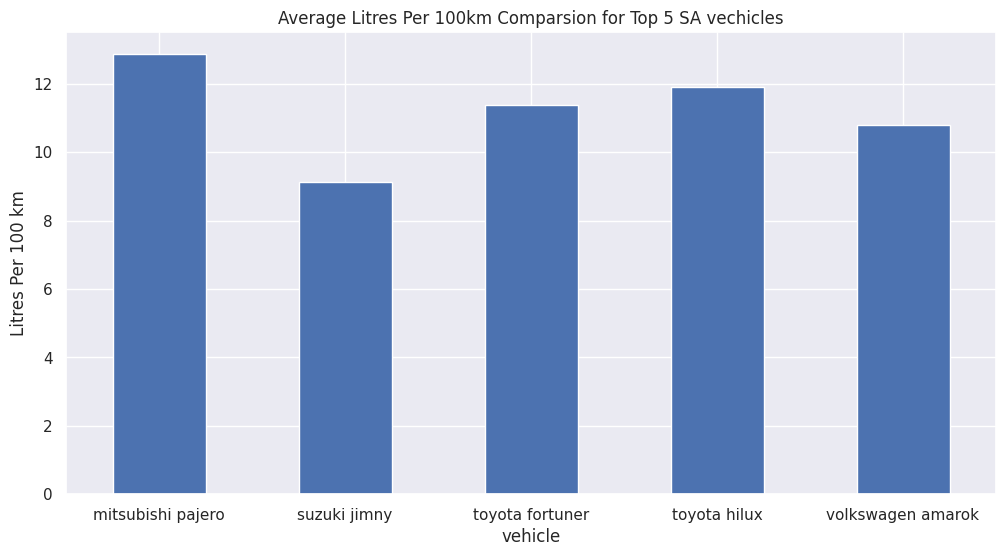

In [111]:
top5_sa_v.groupby('vehicle')['litres_per_100km'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel("Litres Per 100 km")
plt.title("Average Litres Per 100km Comparsion for Top 5 SA vechicles")

In [112]:
top5_vv = ['toyota hilux', 'mitsubishi pajero', 'toyota fortuner', 'suzuki jimny', 'volkswagen amarok']

In [113]:
for top5_v in top5_vv:
    print(top5_v, "\n",top5_sa_v['litres_per_100km'][top5_sa_v['vehicle'].isin([top5_v])].describe(), "\n")

toyota hilux 
 count               1053.0
mean    11.914256674208282
std     3.0009034667966374
min     0.7111158295761947
25%     10.067584531914891
50%     11.212712630331751
75%     13.071173287292815
max      23.89780166666666
Name: litres_per_100km, dtype: float64 

mitsubishi pajero 
 count                907.0
mean    12.863714786382891
std     3.0814542819808843
min     3.0023887880710656
25%     10.803115821917809
50%     12.195269922680414
75%     14.784387010028894
max     23.897801666666666
Name: litres_per_100km, dtype: float64 

toyota fortuner 
 count                855.0
mean     11.36555611060236
std     2.5111560285560626
min     1.7315515859782606
25%      9.899089393305438
50%     11.004104023255813
75%      12.51789611111111
max     22.969731699029122
Name: litres_per_100km, dtype: float64 

suzuki jimny 
 count                808.0
mean     9.143320321165884
std      1.868768871436855
min      2.035446500785627
25%      8.186444169550173
50%      8.927857981132076

Google source: Fuel consumption google check

The Toyota HiLux currently offers fuel consumption from 6.9 to 11.1L/100km this is close the 11.91L/100km average above

The mitsubishi pajero fuel consumption statistics:
Extra Urban: 17.7 litre/100km (5.6km/litre)
Urban: 11.2 litre/100km (8.9km/litre)
Combined: 13.5 litre/100km (7.4km/litre)

The Toyota Fortuner currently offers fuel consumption from 7.6 to 8.6L/100km. which is no to far from the 11.37L/100km average above

Suzuki says the official fuel consumption of the Suzuki Jimny stands at 6.4L per 100km on a combined cycle or the manual, or 6.9L per 100km for the automatic which is close to the above average of 9.14L per 100km

The Volkswagen Amarok is available in a number of variants and body types that are powered by Diesel fuel type(s). It has an estimated fuel consumption starting from 8.4L/100km for Ute /Diesel for the latest year the model was manufactured. The fuel consumption start is close the minimum shown above which 6.33L/100km

6. Which vehicles are the most fuel efficient in each country? (Make sure the
values are reasonable!!! You can look up values of fuel efficiency online
to do a sanity check, but a value of 1l per 100km, or 100l per 100km are
clearly wrong). [5]

According to Driver Knowledge Tests, when looking for the best fuel efficiency you want to have a lower l/100km figure, or a higher km/litre figure. E.g. 4l/100km is more economical than 7l/100km

Given this vehicles with lower l/100km will be the most fuel efficient

In [114]:
# Computing the mean l/100km for each vehicle per country
fe_vehicle_df = df_copy[['Currency', 'car_make', 'litres_per_100km',
                       'car_model']].groupby(['Currency','car_make', 
                                              'car_model'])['litres_per_100km'].mean().reset_index(name='avg_litres_per_100km')

In [120]:
fe_vehicle_df.sample(10)

,Currency,car_make,car_model,avg_litres_per_100km
1917,CA$,mercedes-benz,ml320,11.717081872948329
1913,CA$,mercedes-benz,gle43_amg,13.057206354212763
1600,CA$,bmw,745li,10.805143433746245
2762,£,bmw,123,6.199146852609925
3832,€,fiat,x-1_9,11.120640348806948
2669,R,volkswagen,tdi,6.627121470588235
3639,€,audi,q5,10.638144591635909
1551,CA$,bmw,325es,11.210415741106631
229,$,bmw,633csi,12.676665109635964
1604,CA$,bmw,m2,11.48027543837125


In [165]:
print("Most Fuel Efficient Vehicles in R:")
fe_vehicle_df[fe_vehicle_df['Currency'].isin(['R'])].nsmallest(5, 'avg_litres_per_100km')

Most Fuel Efficient Vehicles in R:


,Currency,car_make,car_model,avg_litres_per_100km
2453,R,mercedes-benz,380sel,4.0004761673114375
2578,R,renault,kwid,5.260123171690326
2593,R,suzuki,ciaz,5.47657954861111
2261,R,citroen,xsara,5.5307700452953235
2239,R,bmw,compact,5.566136042162503


In [122]:
print("Most Fuel Efficient Vehicles in £:")
fe_vehicle_df[fe_vehicle_df['Currency'].isin(['£'])].nsmallest(5, 'avg_litres_per_100km')

Most Fuel Efficient Vehicles in £:


,Currency,car_make,car_model,avg_litres_per_100km
2874,£,bmw,i3,2.0570481918890344
3053,£,isuzu,pickup,2.5097090118404903
3173,£,mercedes-benz,a250e,2.964044724025995
3240,£,mercedes-benz,e300de_saloon,3.481610495337431
3321,£,mitsubishi,outlander_phev,3.6767274712214397


In [123]:
print("Most Fuel Efficient Vehicles in $:")
fe_vehicle_df[fe_vehicle_df['Currency'].isin(['$'])].nsmallest(5, 'avg_litres_per_100km')

Most Fuel Efficient Vehicles in $:


,Currency,car_make,car_model,avg_litres_per_100km
843,$,mercedes-benz,b_electric_drive,2.56057501590923
271,$,bmw,i3,3.0085616605477745
1326,$,toyota,passo,3.822103982229402
1413,$,volkswagen,lupo,3.9298371960099816
1336,$,toyota,prius_prime,4.268485783104195


In [124]:
print("Most Fuel Efficient Vehicles in €:")
fe_vehicle_df[fe_vehicle_df['Currency'].isin(['€'])].nsmallest(5, 'avg_litres_per_100km')

Most Fuel Efficient Vehicles in €:


,Currency,car_make,car_model,avg_litres_per_100km
4222,€,renault,11,2.5439595322580644
4312,€,toyota,prius_plug-in,3.5866888915753914
3748,€,bmw,740e_xdrive,3.94107898882986
3885,€,honda,nc700sa,4.177970431640095
3835,€,ford,connect,4.322082779646075


In [125]:
print("Most Fuel Efficient Vehicles in CA$:")
fe_vehicle_df[fe_vehicle_df['Currency'].isin(['CA$'])].nsmallest(5, 'avg_litres_per_100km')

Most Fuel Efficient Vehicles in CA$:


,Currency,car_make,car_model,avg_litres_per_100km
1603,CA$,bmw,i3,3.830896354145361
2070,CA$,toyota,prius_prime,4.132695215581292
2069,CA$,toyota,prius_plug-in,5.17059913329946
2068,CA$,toyota,prius_c,5.2151104075511405
1716,CA$,hyundai,ioniq,5.269928985589026


According to carsguide, Anything that is listed as less than 6-litres/100km qualifies as fuel efficient. All the top 5 fuel efficient vehicles in each country are below 6-litres/100km which conforms with fuel efficency. The values are also reasonable as they are above 1-litre/100km

Most sources for checking fuel efficiency or fuel efficient vehicles report fuel efficiency in (l/100km). Based on the statistical summary and distribution plot, the fuel efficiency values in (l/100km) are realistic in accordance with values presented by https://mybroadband.co.za/news/industrynews/442986-top-20-fuel-efficient-vehicles-in-south-africa.html, with fuel efficiency values ranging from 2,6 l/100km to 5,6 l/km.

7. Plot the difference in fuel efficiency for the top 5 Canadian vehicles between
seasons. Would you expect to see big differences, and do you see them?
[3]


In [126]:
# using the Canadian filtered datafram from before df4
df4.head()

,user_ID,date_fueled,date_captured,odometer,gallons,cost_per_gallon,float_cpg,total_spent,Currency,float_tot_spent,...,miles,user_url,car_make,car_model,car_year,litres_filled,km_driven,litres_per_100km,vehicle_age,float_cpl
70,106319,2022-03-23,2022-03-23,94025.0,13.366,CA$6.43,6.43,CA$85.96,CA$,85.96,...,241.92460000000003,https://www.somewebsite.com/jeep/wrangler/2005...,jeep,wrangler,2005.0,50.595813904943995,387.07936000000007,13.071173287292815,17.0,1.6986262966628942
157,1111957,2022-02-17,2022-02-17,21506.0,7.781,CA$5.90,5.9,CA$45.92,CA$,45.92,...,143.9485,https://www.somewebsite.com/volkswagen/atlas/2...,volkswagen,atlas,2018.0,29.454289091304,230.3176,12.788553324324322,4.0,1.5586151089130758
203,254763,2022-02-17,2022-02-17,NaN,14.473,CA$5.67,5.67,CA$82.07,CA$,82.07,...,329.9,https://www.somewebsite.com/hyundai/tucson/201...,hyundai,tucson,2013.0,54.786264749832,527.84,10.379331757697786,9.0,1.4978555368707016
221,1071827,2022-01-03,2022-01-03,6232.0,14.191,CA$5.14,5.14,CA$73.01,CA$,73.01,...,255.43800000000002,https://www.somewebsite.com/volkswagen/atlas/2...,volkswagen,atlas,2021.0,53.718778626744005,408.7008000000001,13.143790916666664,1.0,1.357844349120883
245,37284,2010-04-01,2010-04-09,87674.0,8.152,CA$3.63,3.63,CA$29.59,CA$,29.59,...,278.7984,https://www.somewebsite.com/kia/rio/2001/37284,kia,rio,2001.0,30.858676863167997,446.07744,6.917784692982456,9.0,0.9589445500600787


Top 5 in Canada

In [127]:
df4.groupby(['car_make', 'car_model']).car_make.count().reset_index(name='count').nlargest(n=5, columns=['count'])

,car_make,car_model,count
329,mazda,3_sport,726
566,toyota,matrix,506
211,hyundai,accent,469
613,volkswagen,jetta,447
605,volkswagen,golf,443


In [128]:
top_ca_car_make = ['mazda', 'toyota', 'hyundai', 'volkswagen']
top_ca_car_model = ['3_sport', 'matrix', 'accent', 'jetta', 'golf']

top5_ca_vehicles_df = df4[(df4['car_make'].isin(top_ca_car_make)) & (df4['car_model'].isin(top_ca_car_model))]

Text(0.5, 1.0, 'Difference in Fuel Efficiency for the Top 5 Canadian Vehicles Between Seasons')

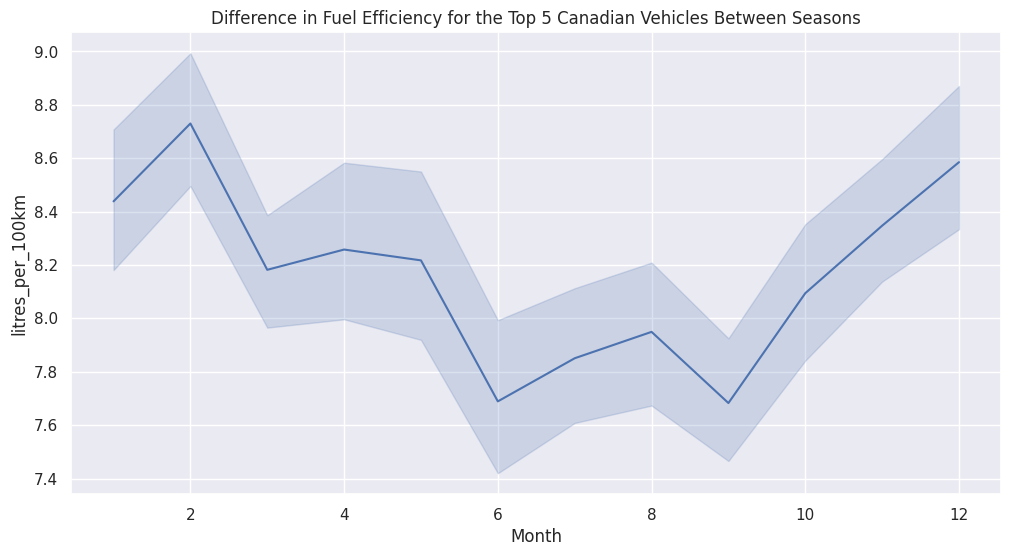

In [129]:
sns.lineplot(x=top5_ca_vehicles_df['date_fueled'].dt.month, y=top5_ca_vehicles_df['litres_per_100km'])
plt.xlabel("Month")
plt.title("Difference in Fuel Efficiency for the Top 5 Canadian Vehicles Between Seasons")

Yes. The fuel efficiency is not at best for the 9 month to the 12th month continuing to the 2nd month, as there are huge spikes in fuel efficiency around that time. Fuel Efficiency is at its worst on the 2nd as the huge spikes goes up to the 2nd month. So big differences are expected from the 9th month until the 2nd month

Text(0.5, 1.0, 'Difference in Fuel Efficiency for the Top 5 Canadian Vehicles Between Seasons')

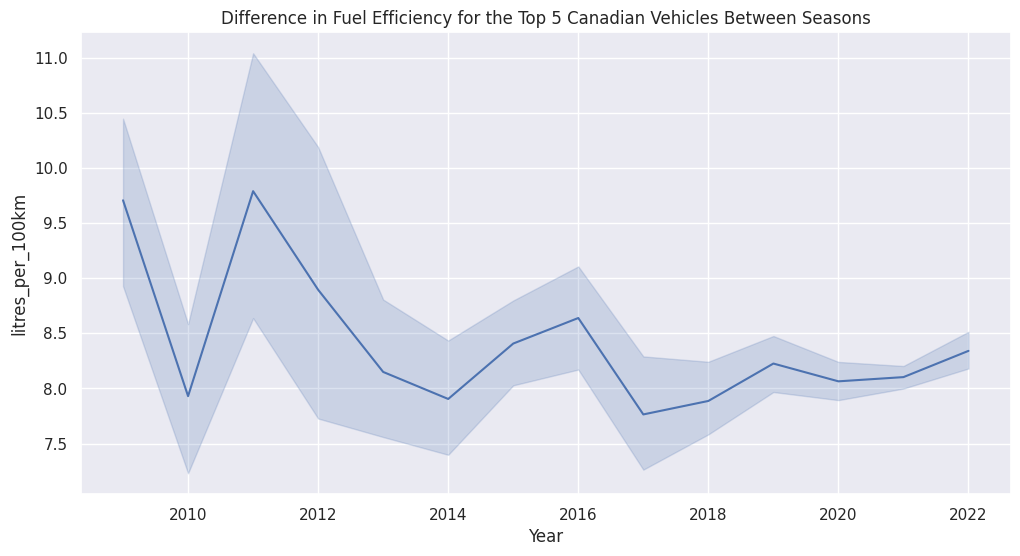

In [130]:
# Extra plot for checking years
sns.lineplot(x=top5_ca_vehicles_df['date_fueled'].dt.year, y=top5_ca_vehicles_df['litres_per_100km'])
plt.xlabel("Year")
plt.title("Difference in Fuel Efficiency for the Top 5 Canadian Vehicles Between Seasons")

8. Show the correlations between fuel efficiency and other features. You
should find that there is a relative strongly correlation with distance travelled, the age of the vehicle, and the model of vehicle. [5]


In [131]:
df_copy.shape

(732040, 22)

In [132]:
df_copy.isna().sum() / len(df_copy)*100

user_ID                             0.0
date_fueled                         0.0
date_captured                       0.0
odometer             15.498333424403038
gallons                             0.0
cost_per_gallon                     0.0
float_cpg                           0.0
total_spent                         0.0
Currency                            0.0
float_tot_spent                     0.0
mpg                                 0.0
miles                               0.0
user_url                            0.0
car_make                            0.0
car_model                           0.0
car_year           0.014070269384186656
litres_filled                       0.0
km_driven                           0.0
litres_per_100km                    0.0
vehicle_age          0.5315283317851484
float_cpl                           0.0
cpl_rands                           0.0
dtype: float64

Since the percentage of missing values by car_year < 3%, the missing values will be deleted using 3% thumb rule

In [133]:
# drop missing values
df_copy = df_copy.dropna(subset=['car_year'])

In [134]:
df_copy.isna().sum()/len(df_copy) * 100

user_ID                           0.0
date_fueled                       0.0
date_captured                     0.0
odometer           15.497645289143739
gallons                           0.0
cost_per_gallon                   0.0
float_cpg                         0.0
total_spent                       0.0
Currency                          0.0
float_tot_spent                   0.0
mpg                               0.0
miles                             0.0
user_url                          0.0
car_make                          0.0
car_model                         0.0
car_year                          0.0
litres_filled                     0.0
km_driven                         0.0
litres_per_100km                  0.0
vehicle_age         0.517530880389979
float_cpl                         0.0
cpl_rands                         0.0
dtype: float64

/tmp/ipykernel_1041/1909883453.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy['odometer'], bins=500)


<Axes: xlabel='odometer', ylabel='Density'>

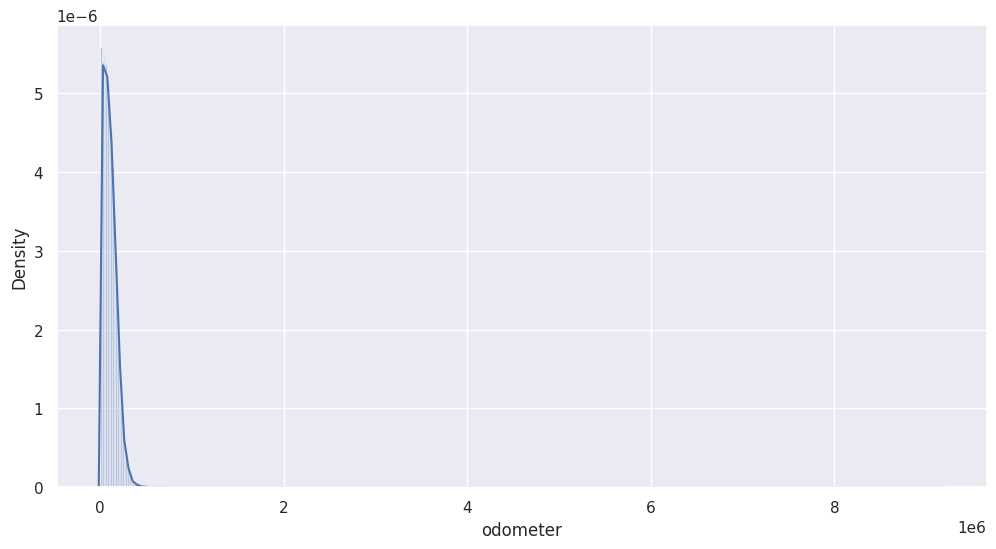

In [135]:
sns.distplot(df_copy['odometer'], bins=500)

/tmp/ipykernel_1041/1093768197.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy['vehicle_age'])


<Axes: xlabel='vehicle_age', ylabel='Density'>

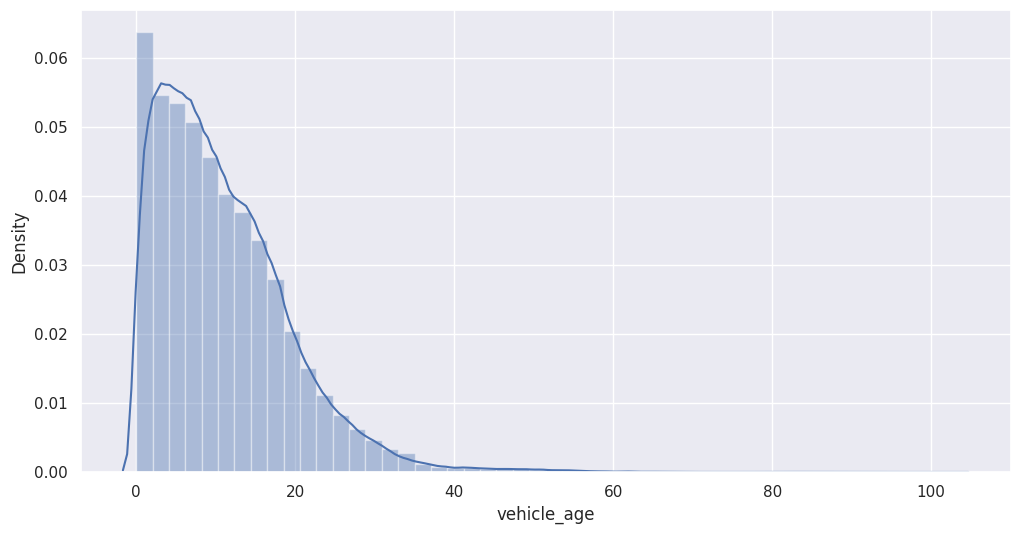

In [136]:
sns.distplot(df_copy['vehicle_age'])

Since the data distribution for vehicle_age and odometer is skewed, the median value will be used to fill in missing values.

In [137]:
#df_copy = df_copy.fillna(df_copy.median())

df_copy[df_copy.select_dtypes(include='number').columns] = (
    df_copy.select_dtypes(include='number')
    .fillna(df_copy.median(numeric_only=True))
)

In [138]:
df_copy.isna().sum()/len(df_copy) * 100

user_ID            0.0
date_fueled        0.0
date_captured      0.0
odometer           0.0
gallons            0.0
cost_per_gallon    0.0
float_cpg          0.0
total_spent        0.0
Currency           0.0
float_tot_spent    0.0
mpg                0.0
miles              0.0
user_url           0.0
car_make           0.0
car_model          0.0
car_year           0.0
litres_filled      0.0
km_driven          0.0
litres_per_100km   0.0
vehicle_age        0.0
float_cpl          0.0
cpl_rands          0.0
dtype: float64

There's no missing values now

In [139]:
# # Creating date features
# df_copy['day_fueled'] = df_copy['date_fueled'].dt.day
# df_copy['month_fueled'] = df_copy['date_fueled'].dt.month
# df_copy['year_fueled'] = df_copy['date_fueled'].dt.year
# #df_copy['week_fueled'] = df_copy['date_fueled'].dt.week
# df_copy['weekday_fueled'] = df_copy['date_fueled'].dt.weekday

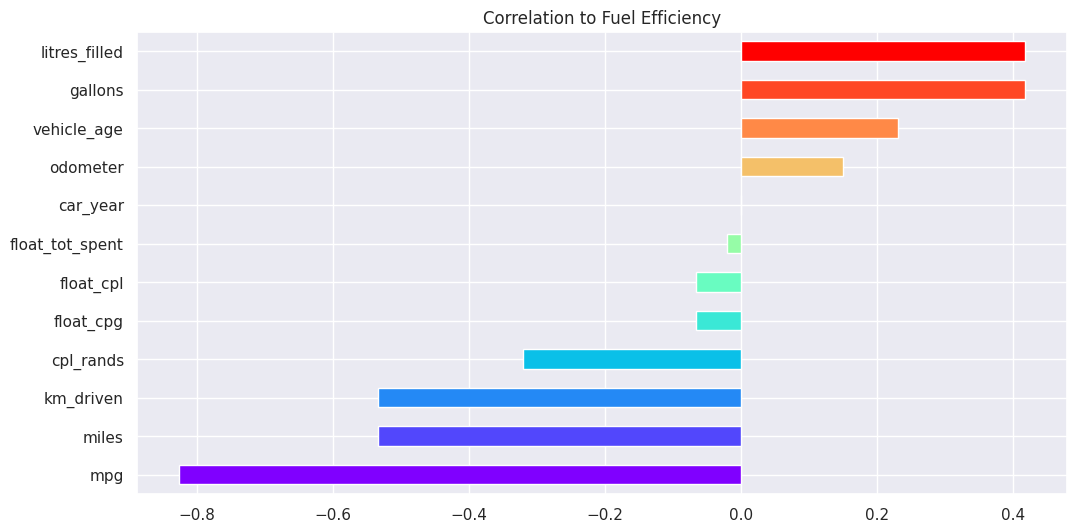


 litres_filled        0.4179300101146824
gallons              0.4179300101146815
vehicle_age         0.23124071508803662
odometer             0.1509367194883735
car_year          0.0010177429370915672
float_tot_spent   -0.020401585563540554
float_cpl          -0.06544041956929585
float_cpg          -0.06544041956929592
cpl_rands          -0.32044472505561383
km_driven           -0.5339365288032623
miles               -0.5339365288032625
mpg                 -0.8258391588505105
dtype: float64


In [140]:
numeric_df = df_copy.select_dtypes(include='number')

# Drop target column for correlation
correlations = numeric_df.drop('litres_per_100km', axis=1) \
    .corrwith(numeric_df['litres_per_100km'])

# Plot
n_fts = len(correlations)
colors = cm.rainbow(np.linspace(0, 1, n_fts))

correlations.sort_values(ascending=True).plot(
    kind='barh', color=colors, figsize=(12, 6)
)
plt.title('Correlation to Fuel Efficiency')
plt.show()

print('\n', correlations.sort_values(ascending=False))


The correlation values above confirm that fuel efficiency is strongly correlated to distance travelled and the age of the vehicle

9. Use a random forest to get a list of the most important variables. How
different are they from each other, and how do these relate to the variables
from the correlations above? [5]

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [142]:
scale = StandardScaler()

In [143]:
X = df_copy[['litres_filled', 'gallons', 'vehicle_age', 'odometer', 'car_year',
          'float_tot_spent', 'float_cpl', 'cpl_rands', 'miles', 'km_driven', 'mpg']]
y = df_copy.litres_per_100km
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [144]:
# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

In [145]:
X_train_stand = scale.fit_transform(X_train_stand)
X_test_stand = scale.fit_transform(X_test_stand)

In [146]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_stand, y_train)

RandomForestRegressor()

In [147]:
rf.feature_importances_

array([1.75498155e-03, 1.59556654e-03, 5.45962768e-05, 1.00834331e-05,
       4.43174392e-05, 1.53641418e-04, 9.49383202e-05, 1.00169326e-04,
       1.55728691e-03, 1.73784164e-03, 9.92896577e-01])

In [148]:
list(map('{:.10f}'.format,rf.feature_importances_))

['0.0017549815',
 '0.0015955665',
 '0.0000545963',
 '0.0000100834',
 '0.0000443174',
 '0.0001536414',
 '0.0000949383',
 '0.0001001693',
 '0.0015572869',
 '0.0017378416',
 '0.9928965772']

Text(0, 0.5, 'Features')

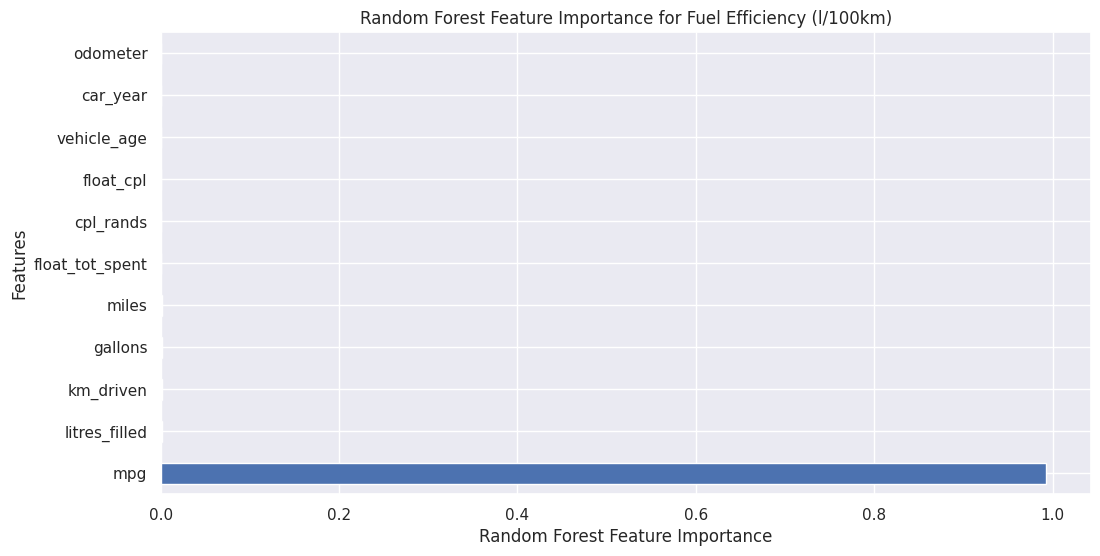

In [149]:
feat_importances_data2 = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances_data2.nlargest(20).plot(kind='barh')
plt.title('Random Forest Feature Importance for Fuel Efficiency (l/100km)')
plt.xlabel('Random Forest Feature Importance')
plt.ylabel('Features')

The strongest correlated feature was mpg with correlation coefficient of value -0.83. The same feature is shown to be the most important fetaure using the random forest feature importance algorithm. The only difference is that the other features are shown to have a feature importance value close to zero. MPG being the strongest correlated and most important feature makes sense as MPG is the distance, measured in miles, that a car can travel per gallon of fuel. MPG is also the primary measurement of a car's fuel efficiency and fuel efficiency is the feature of interest for the random forest feature importance algorithm.

#### 4.3. Fuel Usage in SA

1. Filter the above dataset to focus on SA drivers. [1]

In [150]:
df_copy_sa = df_copy[df_copy['Currency'].isin(['R'])]
df_copy_sa.head()

,user_ID,date_fueled,date_captured,odometer,gallons,cost_per_gallon,float_cpg,total_spent,Currency,float_tot_spent,...,user_url,car_make,car_model,car_year,litres_filled,km_driven,litres_per_100km,vehicle_age,float_cpl,cpl_rands
100,123580,2013-06-06,2013-06-08,92719.0,17.937,R47.05,47.05,R843.99,R,843.99,...,https://www.somewebsite.com/land_rover/discove...,land_rover,discovery,1996.0,67.898931169608,669.44,10.142646266970603,17.0,12.429295063450883,12.429295063450883
323,942891,2018-08-12,2019-08-04,41111.0,6.763,R60.19,60.19,R407.04,R,407.04,...,https://www.somewebsite.com/ford/ecosport/2013...,ford,ecosport,2013.0,25.600739895192,440.40656,5.812978783783784,5.0,15.900515831436953,15.900515831436953
334,426622,2016-06-16,2016-06-16,2430.0,18.011,R48.45,48.45,R872.69,R,872.69,...,https://www.somewebsite.com/land_rover/discove...,land_rover,discovery,2016.0,68.179051641624,446.67280000000005,15.263757193548386,0.0,12.799135936752291,12.799135936752291
375,445133,2022-01-31,2022-01-31,111820.0,17.055,R76.50,76.5,"R1,304.76",R,1.0,...,https://www.somewebsite.com/toyota/fortuner/20...,toyota,fortuner,2011.0,64.56019797612,521.2008000000001,12.386818664921464,11.0,20.209162005398355,20.209162005398355
393,324843,2019-06-24,2020-01-02,42255.0,11.597,R61.17,61.17,R709.42,R,709.42,...,https://www.somewebsite.com/audi/a3/2014/324843,audi,a3,2014.0,43.899420459047995,673.5537599999999,6.517582272727274,5.0,16.159404442747938,16.159404442747938


2. Plot the fuel prices over time for SA. [2]


Text(0, 0.5, 'Cost Per Liter')

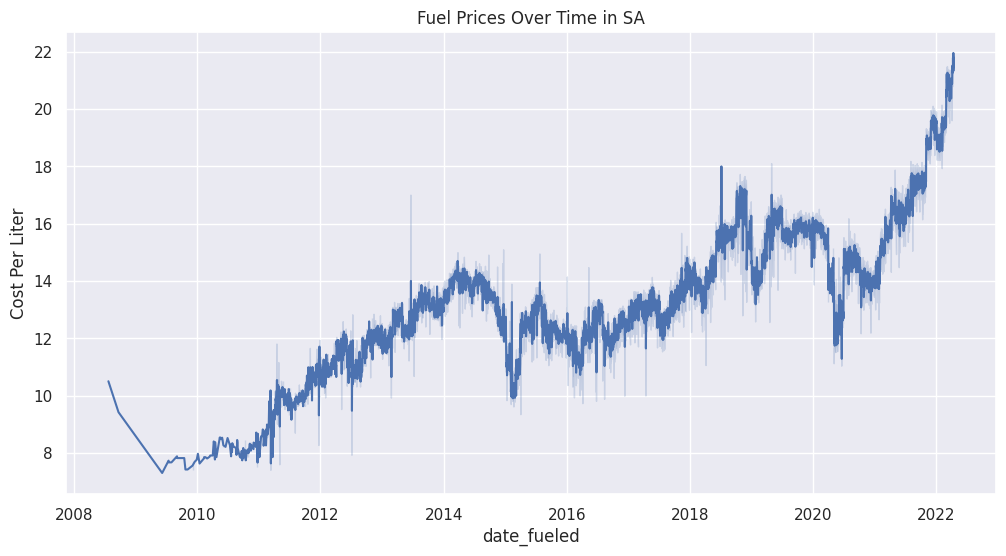

In [151]:
sns.lineplot(x=df_copy_sa['date_fueled'], y=df_copy_sa['float_cpl'])
plt.title("Fuel Prices Over Time in SA")
plt.ylabel("Cost Per Liter")

3. Using a suitable plot, show if the difference in the number of people refueling on a Tuesday vs other days. [3]


In [152]:
# adding day of the week column
df_copy_sa['weekday_fueled'] = df_copy_sa['date_fueled'].dt.weekday
df_copy_sa['weekday_fueled'].unique()

array([3, 6, 0, 4, 5, 2, 1], dtype=int32)

Text(0, 0.5, 'Number of People')

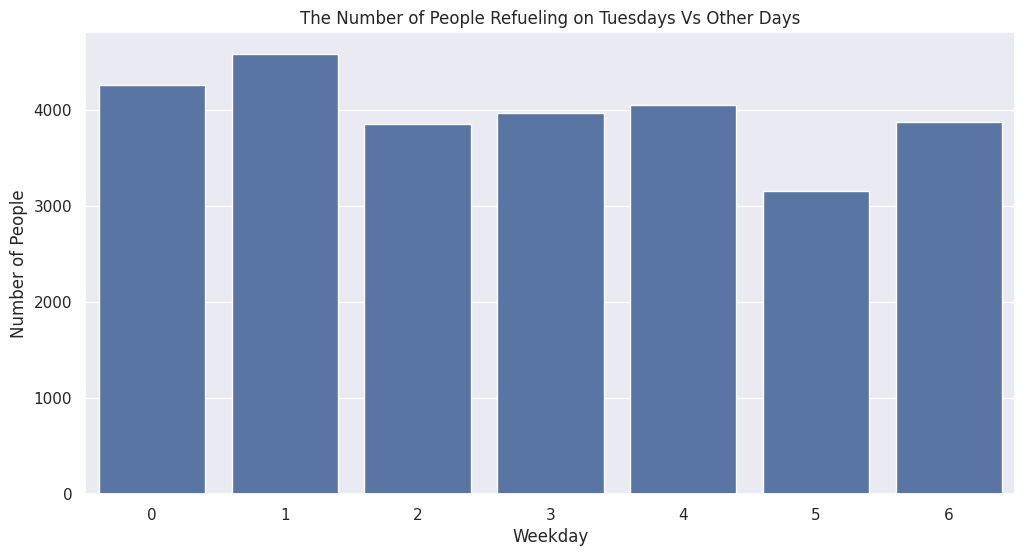

In [153]:
sns.countplot(x=df_copy_sa['weekday_fueled'], data=df_copy_sa)
plt.title("The Number of People Refueling on Tuesdays Vs Other Days")
plt.xlabel("Weekday")
plt.ylabel("Number of People")

Tuesday is represented by the number '1' in the above plot. This is evidence that suggests that more people are refueling on Tuesdays as compared to other days of the week.

4. Now reduce your dataset to only the entries on the 1st Tuesday and 1st
Wednesday in SA every month. [2]


In [154]:
# getting year month
yearMonth_data2_sa = df_copy_sa['date_fueled'].dt.to_period('M')
yearMonth_data2_sa = list(yearMonth_data2_sa.astype(str))

In [155]:
# getting date of the first Tuesdays
first_tue_data2_sa = np.busday_offset(yearMonth_data2_sa, 0, 
                           roll='forward', 
                           weekmask='Tue')

# getting date of first Wednesdays
first_wed_data2_sa = np.busday_offset(yearMonth_data2_sa, 0, 
                           roll='forward', 
                           weekmask='Wed')

In [156]:
# results
first_tue_data2_sa

array(['2013-06-04', '2018-08-07', '2016-06-07', ..., '2019-03-05',
       '2017-08-01', '2018-01-02'], dtype='datetime64[D]')

In [157]:
# first Tuesday and Wednesday dataframe
df_1st_tw = df_copy_sa[df_copy_sa['date_fueled'].isin(first_tue_data2_sa) | df_copy_sa['date_fueled'].isin(first_wed_data2_sa)]

In [158]:
# way to confirm the above opperation
len(df_copy_sa[df_copy_sa['date_fueled'].isin(first_tue_data2_sa) | df_copy_sa['date_fueled'].isin(first_wed_data2_sa)])
len(df_copy_sa[df_copy_sa['date_fueled'] == first_tue_data2_sa])
len(df_copy_sa[df_copy_sa['date_fueled'] == first_wed_data2_sa])

843

5. For each Tuesday and Wednesday, add an indicator for whether the price
goes up or the price goes down that month. [4]


SA fuel prices are adjusted at midnight of the first Tuesday of the month. 

If price is decreasing: More people fueling on the first Wed

If price is increasing: More people fueling on the first Tues

In [159]:
# usual litres filled on Tuesdays 
avg_tue_refuel = df_1st_tw[df_1st_tw['weekday_fueled'] == 1]['litres_filled'].mean()
print("Average Tuesday refuel:", avg_tue_refuel)

# usual litres filled on Wednesdays
avg_wed_refuel = df_1st_tw[df_1st_tw['weekday_fueled'] == 2]['litres_filled'].mean()
print("Average Wednesday refuel:", avg_wed_refuel)

Average Tuesday refuel: 45.88476617428145
Average Wednesday refuel: 49.33861264251767


In [160]:
# if price is increasing - more people on Tues
# price goes up when number of refuels on Tues are more than average

# first tuesday dataframe
df_1st_t = df_1st_tw[df_1st_tw['weekday_fueled'] == 1]
conditions_t = [
    (df_1st_t['litres_filled'] > avg_tue_refuel),
    (df_1st_t['litres_filled'] < avg_tue_refuel)
]

values_t = ['goes up', 'goes down']

df_1st_t['fuel_price'] = np.select(conditions_t, values_t, default='no change')

In [161]:
# if price is decreasing - more people on Wed
# price goes down when number of refuels on Wed are less than average

# first wednesday dataframe
df_1st_w = df_1st_tw[df_1st_tw['weekday_fueled'] == 2]
conditions_w = [
    (df_1st_w['litres_filled'] > avg_wed_refuel),
    (df_1st_w['litres_filled'] < avg_wed_refuel) 
]

values_w = ['goes down', 'goes up']

df_1st_w['fuel_price'] = np.select(conditions_w, values_w, default='no change')

In [162]:
df_1st_tw = pd.concat([df_1st_t, df_1st_w])
df_1st_tw.head()

,user_ID,date_fueled,date_captured,odometer,gallons,cost_per_gallon,float_cpg,total_spent,Currency,float_tot_spent,...,car_model,car_year,litres_filled,km_driven,litres_per_100km,vehicle_age,float_cpl,cpl_rands,weekday_fueled,fuel_price
871,141114,2017-08-01,2017-08-01,18270.0,7.018,R43.80,43.8,R307.36,R,307.36,...,hilux,2012.0,26.566019900112,205.48704000000004,12.928318934426228,5.0,11.5707358932869,11.5707358932869,1,goes down
2156,760662,2019-04-02,2019-04-02,21783.0,4.108,R55.27,55.27,R227.03,R,227.03,...,figo,2014.0,15.550471608671998,121.59679999999999,12.788553324324322,5.0,14.600789333834864,14.600789333834864,1,goes down
3635,967248,2021-02-02,2021-02-02,6357.0,9.846,R53.83,53.83,R529.98,R,529.98,...,t-cross,2019.0,37.271164425264,400.14144,9.3144975,2.0,14.22038157843913,14.22038157843913,1,goes down
4524,147759,2020-02-04,2020-02-04,104136.0,15.009,R61.17,61.17,R918.16,R,918.16,...,c200,2011.0,56.815245466056,602.7614400000001,9.425826155378484,9.0,16.159404442747938,16.159404442747938,1,goes up
4699,1014569,2021-10-05,2021-10-05,53205.0,9.197,R70.22,70.22,R645.82,R,645.82,...,baleno,2017.0,34.814432177448,618.0383999999999,5.633053250000001,4.0,18.55016151658918,18.55016151658918,1,goes down


6. Do more people refuel on the first Wednesday of the month when the
prices goes down? [2]


In [163]:
df_1st_tw[df_1st_tw['weekday_fueled'] == 2]['fuel_price'].value_counts().rename_axis('Fuel_Price').reset_index(name='No_of_people_refueling')


,Fuel_Price,No_of_people_refueling
0,goes up,444
1,goes down,399


No. Less people refuel on the 1st Wed when prices go down

7. Do more people refuel on the first Wednesday of the month when the prices
goes up? [2]

In [164]:
df_1st_tw[df_1st_tw['weekday_fueled'] == 1]['fuel_price'].value_counts().rename_axis('Fuel_Price').reset_index(name='No_of_people_refueling')


,Fuel_Price,No_of_people_refueling
0,goes down,743
1,goes up,712


No. Less people refuel on 1st Tuesday of the month when prices increase.